<h4> Citations for the data</h4>


Data for the weather components : Open data server of Deutscher Wetterdienst (<a>https://opendata.dwd.de/climate_environment/CDC/</a>) <br/>
Data for the tidal heights and water level : B&uuml;ndesanstalt f&uuml;r Gew&auml;esserkunde–BfG (<a>https://www.bafg.de/DE/Home/homepage_node.html</a>)


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


<h1> Extracting Water Levels <h1>

In [3]:
##Water level of Intschede
start=0
file1 = open('Intschede/Intschede-W.zrx', 'r')
wlevels_dates=file1.readlines()
file1.close()

file2=open('Intschede/Stolzenau-W.zrx','r')
wlevels_dates_stolz=file2.readlines()
file2.close()




water_extractor=lambda t: (t[15:19])
date_extractor=lambda t: (t[0:8])
wlevels=[water_extractor(level) for level in wlevels_dates]
wlevels=np.array(wlevels[start:]).astype(float)
dates=[date_extractor(date) for date in wlevels_dates]
dates=np.array(dates[start:]).astype(int)
x=[i for i in range(len(wlevels))]

wlevels_stolz=[water_extractor(level) for level in wlevels_dates_stolz]


wlevels=np.array(wlevels)

wlevels_stolz=np.array(wlevels_stolz)

print(len(wlevels_stolz))
print(len(wlevels))


7671
7671


<h1> Extracting Tidal Heights <h1>

In [4]:
file=open('Intschede/tidaldata.bsh')
data=file.readlines()
file.close()
tidal_date_extractor=lambda t: (t[0:10])
tidal_extractor=lambda t: (float(t[18:22]))
dates_tidal=[tidal_date_extractor(date) for date in data]
tidal_heights=[tidal_extractor(tide) for tide in data]
# print(dates_tidal)
tidal_df = pd.DataFrame(
    {'date': dates_tidal,
     'tidal heights': tidal_heights
    })


tidal_df=tidal_df.groupby('date')['tidal heights'].mean()
tidalheights=tidal_df.values


<h1> Data Analysis<h1>

In [5]:
def analysedata(filepath):
  result=dict()
  df=pd.read_csv(filepath,sep=';')
  start=df[df["MESS_DATUM"]==20000101].index[0]
  stop=df[df["MESS_DATUM"]==20201231].index[0]

  ppt=df[" RSK"][start:(stop+1)].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  maxwindgust=df["  FX"][start:stop+1].to_numpy()
  meanwind=df["  FM"][start:stop+1].to_numpy()
  meantemp=df[" TMK"][start:stop+1].to_numpy()
  vappressure=df[" VPM"][start:stop+1].to_numpy()
  sdepth=df["SHK_TAG"][start:stop+1].to_numpy()
  rhumidity=df[" UPM"][start:stop+1].to_numpy()
  meanpressure=df["  PM"][start:stop+1].to_numpy()
  cloudcover=df["  NM"][start:stop+1].to_numpy()
  date=df["MESS_DATUM"][start:stop+1].to_numpy()


  result["place"]=filepath[12:-4]
  result["lengthofdata"]=len(ppt)

  missingdates=set(dates)-set(date)

  result["missing_rain"]=np.count_nonzero(ppt==-999)
  result["missing_dates"]=missingdates
  result["missing_mean_wind"]=np.count_nonzero(meanwind==-999)
  result["missing_max_wind_gust"]=np.count_nonzero(maxwindgust==-999)
  result["missing_mean_temp"]=np.count_nonzero(meantemp==-999)
  result["missing_vapour_pressure"]=np.count_nonzero(vappressure==-999)
  result["missing_snow_depth"]=np.count_nonzero(sdepth==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)
  result["missing_mean_pressure"]=np.count_nonzero(meanpressure==-999)
  result["missing_cloud_cover"]=np.count_nonzero(cloudcover==-999)
  result["missing_relative_humidity"]=np.count_nonzero(rhumidity==-999)

  return(result)

barsinghausendata=analysedata('./Intschede/barsinghausen.txt')##good
bassumdata=analysedata('./Intschede/bassum.txt')##good
diepholzdata=analysedata('./Intschede/diepholz.txt')#good
hannoverdata=analysedata('./Intschede/hannover.txt')#good
rahdendata=analysedata('./Intschede/rahden.txt')#good
soltaudata=analysedata('./Intschede/soltau.txt')#good



<h1> Keeping available data<h1>

In [6]:
threshold=1000
def choosecols(filepath):
  takencols=["MESS_DATUM"]
  res=analysedata(filepath)
  if res["missing_rain"]<threshold:
    takencols.append("Precipitation Height/(mm)")
  if res["missing_mean_wind"]<threshold:
    takencols.append("Mean Wind Speed/(m/s)")
  if res["missing_max_wind_gust"]<threshold:
    takencols.append("Max Wind Gust/(m/s)")
  if res["missing_mean_temp"]<threshold:
    takencols.append("Mean Temperature/(C)")
  if res["missing_vapour_pressure"]<threshold:
    takencols.append("Vapour Pressure/(hPa)")
  if res["missing_snow_depth"]<threshold:
    takencols.append("Snow Depth/(cm)")
  if res["missing_relative_humidity"]<threshold:
    takencols.append("Relative Humidity/(%)")
  if res["missing_mean_pressure"]<threshold:
    takencols.append("Mean Pressure/(hPa)")
  if res["missing_cloud_cover"]<threshold:
    takencols.append("Cloud Cover/(oktas)")
  return takencols


barsinghausen_cols=choosecols("./Intschede/barsinghausen.txt")
bassum_cols=choosecols("./Intschede/bassum.txt")
diepholz_cols=choosecols("./Intschede/diepholz.txt")
hannover_cols=choosecols("./Intschede/hannover.txt")
rahden_cols=choosecols("./Intschede/rahden.txt")
soltau_cols=choosecols("./Intschede/soltau.txt")


<h1>Renaming columns and data cleaning<h1>

In [7]:
def renamecols(filepath):
  df=pd.read_csv(filepath,sep=';')
  df.rename(columns={'  FX':'Max Wind Gust/(m/s)',
                     '  FM':'Mean Wind Speed/(m/s)',
                     ' RSK':'Precipitation Height/(mm)',
                     ' TMK':'Mean Temperature/(C)',
                     '  PM':'Mean Pressure/(hPa)',
                     ' VPM':'Vapour Pressure/(hPa)',
                     'SHK_TAG':'Snow Depth/(cm)',
                     ' UPM':'Relative Humidity/(%)',
                     '  NM':'Cloud Cover/(oktas)'}, inplace=True)
  return df

barsinghausen_df=renamecols("./Intschede/barsinghausen.txt")
bassum_df=renamecols("./Intschede/bassum.txt")
diepholz_df=renamecols("./Intschede/diepholz.txt")
hannover_df=renamecols("./Intschede/hannover.txt")
rahden_df=renamecols("./Intschede/rahden.txt")
soltau_df=renamecols("./Intschede/soltau.txt")

def takecols(df,feat):
    start=df[df["MESS_DATUM"]==20000101].index[0]
    stop=df[df["MESS_DATUM"]==20201231].index[0]
    df=df.iloc[start:stop+1]
    idx=[i for i in range(len(df))]
    new_df=df[feat].copy()
    new_df["idx"]=idx
    new_df=new_df.set_index('idx')
    # new_df["waterlevel"]=wlevels
    new_df=new_df.replace(-999,np.nan)
    return(new_df)

barsinghausen_df_scols=takecols(barsinghausen_df,choosecols("./Intschede/barsinghausen.txt"))
bassum_df_scols=takecols(bassum_df,choosecols("./Intschede/bassum.txt"))
diepholz_df_scols=takecols(diepholz_df,choosecols("./Intschede/diepholz.txt"))
hannover_df_scols=takecols(hannover_df,choosecols("./Intschede/hannover.txt"))
rahden_df_scols=takecols(rahden_df,choosecols("./Intschede/rahden.txt"))
soltau_df_scols=takecols(soltau_df,choosecols("./Intschede/soltau.txt"))





<h1> Replace missing data with previous day <h1>

In [8]:
barsinghausen_df_scols_imp=barsinghausen_df_scols.interpolate(method ='linear', limit_direction ='forward')
bassum_df_scols_imp=bassum_df_scols.interpolate(method ='linear', limit_direction ='forward')
diepholz_df_scols_imp=diepholz_df_scols.interpolate(method ='linear', limit_direction ='forward')
hannover_df_scols_imp=hannover_df_scols.interpolate(method ='linear', limit_direction ='forward')
rahden_df_scols_imp=rahden_df_scols.interpolate(method ='linear', limit_direction ='forward')
soltau_df_scols_imp=diepholz_df_scols.interpolate(method ='linear', limit_direction ='forward')





<h1> Creating lagged features<h1>

In [9]:
def buildLaggedFeatures(s,lag=2,dropna=True):
  if type(s) is pd.DataFrame:
      new_dict={}
      for col_name in s:
          new_dict[col_name]=s[col_name]
          # create lagged Series
          for l in range(1,lag+1):
              new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
      res=pd.DataFrame(new_dict,index=s.index)

  elif type(s) is pd.Series:
      the_range=range(lag+1)
      res=pd.concat([s.shift(i) for i in the_range],axis=1)
      res.columns=['lag_%d' %i for i in the_range]
  else:
      print('Only works for DataFrame or Series')
      return None
  if dropna:
      return res.dropna()
  else:
      return res 

Simple data with waterlevel

In [10]:
df_concat_cols_lstm = pd.concat([barsinghausen_df_scols_imp, bassum_df_scols_imp,diepholz_df_scols_imp,hannover_df_scols_imp,rahden_df_scols_imp,soltau_df_scols_imp], axis=1)
dates=(df_concat_cols_lstm.pop("MESS_DATUM"))
df_mean_cols_lstm=df_concat_cols_lstm.groupby(by=df_concat_cols_lstm.columns, axis=1).mean()
df_mean_cols_lstm["Tidal Height/(m)"]=tidalheights
df_mean_cols_lstm["Water Level/(cm)"]=wlevels

df_mean_cols_lstm_wlevels=df_mean_cols_lstm.copy()

df_mean_cols_lstm_wlevels["Water Level Stolzenau/(cm)"]=wlevels_stolz


df_mean_cols_lstm_wlevels_lag=buildLaggedFeatures(df_mean_cols_lstm_wlevels,3)




Index(['Cloud Cover/(oktas)', 'Cloud Cover/(oktas)_lag1',
       'Cloud Cover/(oktas)_lag2', 'Cloud Cover/(oktas)_lag3',
       'Max Wind Gust/(m/s)', 'Max Wind Gust/(m/s)_lag1',
       'Max Wind Gust/(m/s)_lag2', 'Max Wind Gust/(m/s)_lag3',
       'Mean Pressure/(hPa)', 'Mean Pressure/(hPa)_lag1',
       'Mean Pressure/(hPa)_lag2', 'Mean Pressure/(hPa)_lag3',
       'Mean Temperature/(C)', 'Mean Temperature/(C)_lag1',
       'Mean Temperature/(C)_lag2', 'Mean Temperature/(C)_lag3',
       'Mean Wind Speed/(m/s)', 'Mean Wind Speed/(m/s)_lag1',
       'Mean Wind Speed/(m/s)_lag2', 'Mean Wind Speed/(m/s)_lag3',
       'Precipitation Height/(mm)', 'Precipitation Height/(mm)_lag1',
       'Precipitation Height/(mm)_lag2', 'Precipitation Height/(mm)_lag3',
       'Relative Humidity/(%)', 'Relative Humidity/(%)_lag1',
       'Relative Humidity/(%)_lag2', 'Relative Humidity/(%)_lag3',
       'Snow Depth/(cm)', 'Snow Depth/(cm)_lag1', 'Snow Depth/(cm)_lag2',
       'Snow Depth/(cm)_lag3', 'Vap

In [11]:
maxlag=55
hannover_lagged=buildLaggedFeatures(hannover_df_scols_imp,maxlag,False)
barsinghausen_lagged=buildLaggedFeatures(barsinghausen_df_scols_imp,maxlag,False)
rahden_lagged=buildLaggedFeatures(rahden_df_scols_imp,maxlag,False)
diepholz_lagged=buildLaggedFeatures(diepholz_df_scols_imp,maxlag,False)
bassum_lagged=buildLaggedFeatures(bassum_df_scols_imp,maxlag,False)
soltau_lagged=buildLaggedFeatures(soltau_df_scols_imp,maxlag,False)

hannover_lagged_new=hannover_lagged.iloc[maxlag:]
barsinghausen_lagged_new=barsinghausen_lagged.iloc[maxlag:]
rahden_lagged_new=rahden_lagged.iloc[maxlag:]
diepholz_lagged_new=diepholz_lagged.iloc[maxlag:]
bassum_lagged_new=bassum_lagged.iloc[maxlag:]
soltau_lagged_new=soltau_lagged.iloc[maxlag:]


Index(['MESS_DATUM', 'MESS_DATUM_lag1', 'MESS_DATUM_lag2', 'MESS_DATUM_lag3',
       'MESS_DATUM_lag4', 'MESS_DATUM_lag5', 'MESS_DATUM_lag6',
       'MESS_DATUM_lag7', 'MESS_DATUM_lag8', 'MESS_DATUM_lag9',
       ...
       'Cloud Cover/(oktas)_lag46', 'Cloud Cover/(oktas)_lag47',
       'Cloud Cover/(oktas)_lag48', 'Cloud Cover/(oktas)_lag49',
       'Cloud Cover/(oktas)_lag50', 'Cloud Cover/(oktas)_lag51',
       'Cloud Cover/(oktas)_lag52', 'Cloud Cover/(oktas)_lag53',
       'Cloud Cover/(oktas)_lag54', 'Cloud Cover/(oktas)_lag55'],
      dtype='object', length=560)


<h1> Concatenate the lagged featured dataframes<h1>

In [12]:
df_concat_cols = pd.concat([hannover_lagged_new,barsinghausen_lagged_new,rahden_lagged_new,diepholz_lagged_new,bassum_lagged_new,soltau_lagged_new], axis=1)
datecols=["MESS_DATUM_lag"+str(i) for i in range(1,maxlag+1)]

for date in datecols:
  dates=df_concat_cols.pop(date)
df_concat_cols.pop("MESS_DATUM")


Index(['MESS_DATUM', 'MESS_DATUM_lag1', 'MESS_DATUM_lag2', 'MESS_DATUM_lag3',
       'MESS_DATUM_lag4', 'MESS_DATUM_lag5', 'MESS_DATUM_lag6',
       'MESS_DATUM_lag7', 'MESS_DATUM_lag8', 'MESS_DATUM_lag9',
       ...
       'Cloud Cover/(oktas)_lag46', 'Cloud Cover/(oktas)_lag47',
       'Cloud Cover/(oktas)_lag48', 'Cloud Cover/(oktas)_lag49',
       'Cloud Cover/(oktas)_lag50', 'Cloud Cover/(oktas)_lag51',
       'Cloud Cover/(oktas)_lag52', 'Cloud Cover/(oktas)_lag53',
       'Cloud Cover/(oktas)_lag54', 'Cloud Cover/(oktas)_lag55'],
      dtype='object', length=2408)
Index(['Precipitation Height/(mm)', 'Precipitation Height/(mm)_lag1',
       'Precipitation Height/(mm)_lag2', 'Precipitation Height/(mm)_lag3',
       'Precipitation Height/(mm)_lag4', 'Precipitation Height/(mm)_lag5',
       'Precipitation Height/(mm)_lag6', 'Precipitation Height/(mm)_lag7',
       'Precipitation Height/(mm)_lag8', 'Precipitation Height/(mm)_lag9',
       ...
       'Cloud Cover/(oktas)_lag46', 'Clou

<h1>Mean over the respective lags<h1> 
For example lag1 of hannover and lag 1 of Bassum

In [13]:
df_mean_cols=df_concat_cols.groupby(by=df_concat_cols.columns, axis=1).mean()
df_mean_cols["Water Level/(cm)"]=wlevels[maxlag:]
df_mean_cols["Tidal Height/(m)"]=tidalheights[maxlag:]



     Cloud Cover/(oktas)  Cloud Cover/(oktas)_lag1  Cloud Cover/(oktas)_lag10  \
idx                                                                             
55              3.766667                  7.800000                   6.900000   
56              3.633333                  3.766667                   4.900000   
57              5.700000                  3.633333                   7.300000   
58              6.100000                  5.700000                   7.566667   
59              7.466667                  6.100000                   7.700000   

     Cloud Cover/(oktas)_lag11  Cloud Cover/(oktas)_lag12  \
idx                                                         
55                    5.233333                   6.433333   
56                    6.900000                   5.233333   
57                    4.900000                   6.900000   
58                    7.300000                   4.900000   
59                    7.566667                   7.300000   

    

<h1> Use of Simple Moving Average on the input data <h1>

In [14]:
def simplemean(df,window,feat):
  df_feat=pd.DataFrame(data=df[feat].values, columns=[feat])
  df_feat=df_feat.rolling(window=window).mean()
  return(df_feat.values.flatten())
def create_simplemean(window,df,start):
  features=[cols for cols in (df.columns)]
  df_smean=pd.DataFrame(columns=features)
  for feat in features:
    df_smean[feat]=simplemean(df,window,feat)
  df_smean['Water Level/(cm)']=wlevels[start:]
  return df_smean


In [15]:
SMAwindow=55
hannover_smooth=create_simplemean(SMAwindow,hannover_df_scols_imp,0)
barsinghausen_smooth=create_simplemean(SMAwindow,barsinghausen_df_scols_imp,0)
rahden_smooth=create_simplemean(SMAwindow,rahden_df_scols_imp,0)
diepholz_smooth=create_simplemean(SMAwindow,diepholz_df_scols_imp,0)
bassum_smooth=create_simplemean(SMAwindow,bassum_df_scols_imp,0)
soltau_smooth=create_simplemean(SMAwindow,soltau_df_scols_imp,0)


In [16]:
df_concat_cols_sma = pd.concat([hannover_smooth,barsinghausen_smooth,rahden_smooth,diepholz_smooth,bassum_smooth,soltau_smooth], axis=1)


Index(['MESS_DATUM', 'Precipitation Height/(mm)', 'Mean Wind Speed/(m/s)',
       'Max Wind Gust/(m/s)', 'Mean Temperature/(C)', 'Vapour Pressure/(hPa)',
       'Snow Depth/(cm)', 'Relative Humidity/(%)', 'Mean Pressure/(hPa)',
       'Cloud Cover/(oktas)', 'Water Level/(cm)', 'MESS_DATUM',
       'Precipitation Height/(mm)', 'Mean Temperature/(C)',
       'Vapour Pressure/(hPa)', 'Relative Humidity/(%)', 'Water Level/(cm)',
       'MESS_DATUM', 'Precipitation Height/(mm)', 'Mean Temperature/(C)',
       'Vapour Pressure/(hPa)', 'Relative Humidity/(%)', 'Water Level/(cm)',
       'MESS_DATUM', 'Precipitation Height/(mm)', 'Mean Wind Speed/(m/s)',
       'Max Wind Gust/(m/s)', 'Mean Temperature/(C)', 'Vapour Pressure/(hPa)',
       'Relative Humidity/(%)', 'Mean Pressure/(hPa)', 'Cloud Cover/(oktas)',
       'Water Level/(cm)', 'MESS_DATUM', 'Precipitation Height/(mm)',
       'Mean Temperature/(C)', 'Vapour Pressure/(hPa)',
       'Relative Humidity/(%)', 'Water Level/(cm)', 'MESS_DATU

In [17]:
df_mean_cols_sma=df_concat_cols_sma.groupby(by=df_concat_cols_sma.columns, axis=1).mean()
df_mean_cols_sma.pop('MESS_DATUM')
df_mean_cols_sma["Water Level/(cm)"]=wlevels
df_mean_cols_sma["Tidal Height/(m)"]=tidalheights



Index(['Cloud Cover/(oktas)', 'Max Wind Gust/(m/s)', 'Mean Pressure/(hPa)',
       'Mean Temperature/(C)', 'Mean Wind Speed/(m/s)',
       'Precipitation Height/(mm)', 'Relative Humidity/(%)', 'Snow Depth/(cm)',
       'Vapour Pressure/(hPa)', 'Water Level/(cm)', 'Tidal Height/(m)'],
      dtype='object')


<h1> Test-Train Split <h1>

In [18]:
from sklearn.model_selection import train_test_split
def create_test_train(df):
  df_features= df.drop(['Water Level/(cm)'],axis=1)
  df_target = pd.DataFrame(df['Water Level/(cm)'], columns=["Water Level/(cm)"])
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, shuffle=False,stratify=None)

  x_train=x_train.reset_index(drop=True)
  x_test=x_test.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  y_test=y_test.reset_index(drop=True)
  return x_train,x_test,y_train,y_test


def create_test_train_lagged(df,lag):
  wfeats=['Water Level/(cm)_lag'+str(i) for i in range(1,lag+1)]
  wfeats.append('Water Level/(cm)')
  df_features= df.drop(wfeats,axis=1)
  df_target = pd.DataFrame(df['Water Level/(cm)'], columns=["Water Level/(cm)"])
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, shuffle=False,stratify=None)

  x_train=x_train.reset_index(drop=True)
  x_test=x_test.reset_index(drop=True)
  y_train=y_train.reset_index(drop=True)
  y_test=y_test.reset_index(drop=True)
  return x_train,x_test,y_train,y_test

#lagged
x_mean_train,x_mean_test,y_mean_train,y_mean_test=create_test_train(df_mean_cols) 

#sma
x_smean_train,x_smean_test,y_smean_train,y_smean_test=create_test_train(df_mean_cols_sma) 


#with water level of stolzenau
x_train_wlevel,x_test_wlevel,y_train_wlevel,y_test_wlevel=create_test_train(df_mean_cols_lstm_wlevels) 

#with lagged_water level features from stolznau (3days lag)
x_train_wlevel_lag,x_test_wlevel_lag,y_train_wlevel_lag,y_test_wlevel_lag=create_test_train(df_mean_cols_lstm_wlevels_lag) 



<h1> Standardize Data<h1>

In [19]:
#standardize the training set
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def standardize_data(x_train,x_test,y_train,y_test):
  feature_columns =list(set(x_train.keys().values.tolist()))
  featcols=np.asarray(feature_columns)
  # for feature data
  x_train_standardize = x_train[feature_columns].copy()
  x_test_standardize = x_test[feature_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(x_train_standardize)
  x_train_scaled = scaler.transform(x_train_standardize)
  x_test_scaled = scaler.transform(x_test_standardize)
  df_standardized_x_train = pd.DataFrame(x_train_scaled, columns = x_train_standardize.columns)
  df_standardized_x_test = pd.DataFrame(x_test_scaled, columns = x_test_standardize.columns)
  target_columns = ['Water Level/(cm)']

  y_train_standardize = y_train[target_columns].copy()
  y_test_standardize = y_test[target_columns].copy()

  # Create the scaler object
  scaler = StandardScaler()
  # Fit the data to scaler
  scaler.fit(y_train_standardize)
  y_train_scaled = scaler.transform(y_train_standardize)
  y_test_scaled = scaler.transform(y_test_standardize)
  df_standardized_y_train = pd.DataFrame(y_train_scaled, columns = y_train_standardize.columns)
  df_standardized_y_test = pd.DataFrame(y_test_scaled, columns = y_test_standardize.columns)


  return(df_standardized_x_train,df_standardized_x_test,df_standardized_y_train,df_standardized_y_test,scaler)




<h1> Datasets ready to train !<h1>

lagged data

In [20]:
x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard,scaler_mean=standardize_data(x_mean_train, x_mean_test,y_mean_train,y_mean_test)

(6092, 505)


SMA

In [21]:
x_smean_train_standard,x_smean_test_standard,y_smean_train_standard,y_smean_test_standard,scaler_smean=standardize_data(x_smean_train, x_smean_test,y_smean_train,y_smean_test)


(6136, 10)


lstm data with waterlevel of stolzenau



In [22]:
x_train_wlevel_standard,x_test_wlevel_standard,y_train_wlevel_standard,y_test_wlevel_standard,scaler_wlevel=standardize_data(x_train_wlevel, x_test_wlevel,y_train_wlevel,y_test_wlevel)


(6136, 11)


lagged water levels of stolzenau and intschede


In [24]:
x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,scaler_wlevel_lag=standardize_data(x_train_wlevel_lag, x_test_wlevel_lag,y_train_wlevel_lag,y_test_wlevel_lag)
print(x_train_wlevel_standard_lag.shape)

(6134, 47)


<h1> Linear Regression Model <h1>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
def fitLRmodel(x_train,x_test,y_train,y_test):
  reg= LinearRegression()
  reg.fit(x_train, y_train)
  pred_test_regression=reg.predict(x_test)
  pred_train_regression=reg.predict(x_train)
  r2score=reg.score(x_test, y_test)
  test_error=np.sqrt(mean_squared_error(y_test,pred_test_regression))
  train_error=np.sqrt(mean_squared_error(y_train,pred_train_regression))
  return pred_test_regression,pred_train_regression,train_error,test_error,r2score

In [27]:
def convert_to_real(scaler,y_train_standard,y_test_standard,prediction_test_standard,prediction_train_standard):
  y_train_inv=scaler.inverse_transform(y_train_standard.values.reshape(1,-1))
  y_test_inv=scaler.inverse_transform(y_test_standard.values.reshape(1,-1))
  y_pred_test_inv=scaler.inverse_transform(prediction_test_standard)
  y_pred_train_inv=scaler.inverse_transform(prediction_train_standard)
  return y_train_inv,y_test_inv,y_pred_test_inv,y_pred_train_inv

In [28]:
def plotresults(actual,predicted):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 30})
  plt.plot(actual.flatten(),'b',marker='.',label="true")
  plt.plot(predicted.flatten(),'r',marker='.',label="predicted")
  plt.ylabel("Water Level/(cm)")
  plt.xlabel("Days")
  plt.legend(prop={'size':25})
  # plt.savefig("Results/linear-regression-waterlevel-lagged-data.png")

<h1>Training Process<h1>

In [29]:
pred_test_mean,pred_train_mean,error_train_mean,error_test_mean,r2score_mean=fitLRmodel(x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard)
y_train_mean_inv,y_test_mean_inv,y_pred_test_mean_inv,y_pred_train_mean_inv=convert_to_real(scaler_mean,y_mean_train_standard,y_mean_test_standard,pred_test_mean,pred_train_mean)

0.5106578646161053 0.6732041474955534 0.48086630858096535


In [30]:
error_test_mean_inv=scaler_mean.inverse_transform(error_test_mean.reshape(-1,1))
error_train_mean_inv=scaler_mean.inverse_transform(error_train_mean.reshape(-1,1))
# print(y_test_mean_inv)

# print(y_pred_test_mean_inv)
etestm=np.sqrt(mean_squared_error(y_test_mean_inv.flatten(),y_pred_test_mean_inv.flatten()))

etrainm=np.sqrt(mean_squared_error(y_train_mean_inv.flatten(),y_pred_train_mean_inv.flatten()))


86.88119243719456
65.90358120984651
[[235.50256348]] [[256.48017471]]


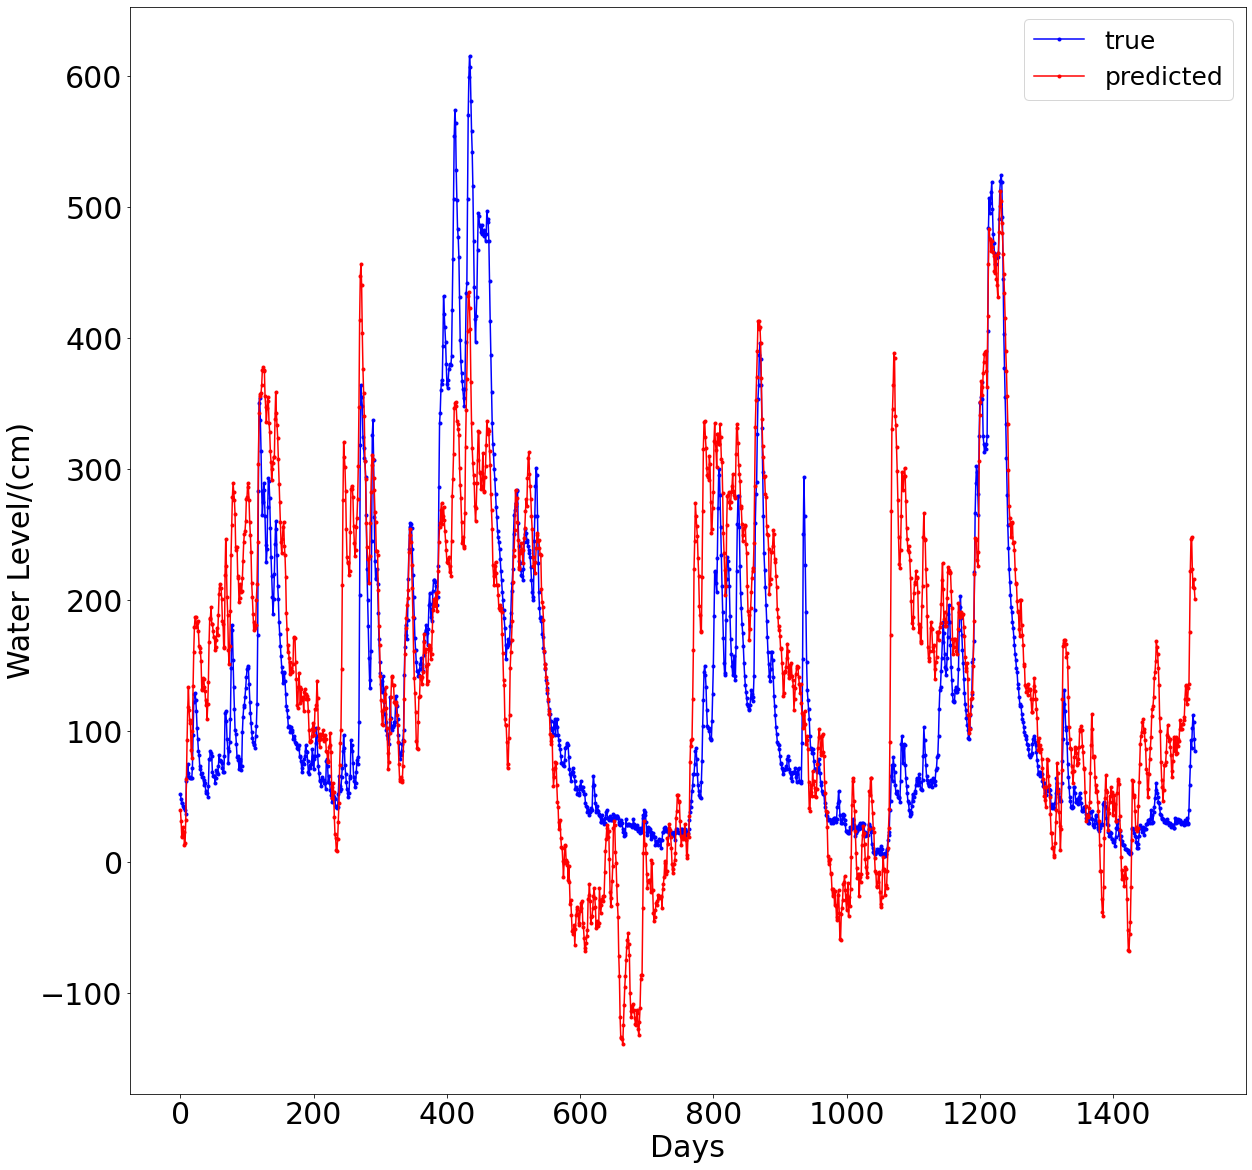

In [32]:
plotresults(y_test_mean_inv,y_pred_test_mean_inv)

In [33]:
pred_test_smean,pred_train_smean,error_train_smean,error_test_smean,r2score_smean=fitLRmodel(x_smean_train_standard[SMAwindow:],x_smean_test_standard,y_smean_train_standard[SMAwindow:],y_smean_test_standard)
y_train_smean_inv,y_test_smean_inv,y_pred_test_smean_inv,y_pred_train_smean_inv=convert_to_real(scaler_smean,y_smean_train_standard[SMAwindow:],y_smean_test_standard,pred_test_smean,pred_train_smean)
print(error_train_smean,error_test_smean,r2score_smean)

print("test",np.sqrt(mean_squared_error(y_test_smean_inv.flatten(),y_pred_test_smean_inv.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_smean_inv.flatten(),y_pred_train_smean_inv.flatten())))




0.6346268878355792 0.7009638710745814 0.43326933442088345
test 90.5594110149854
train 81.98915742769914


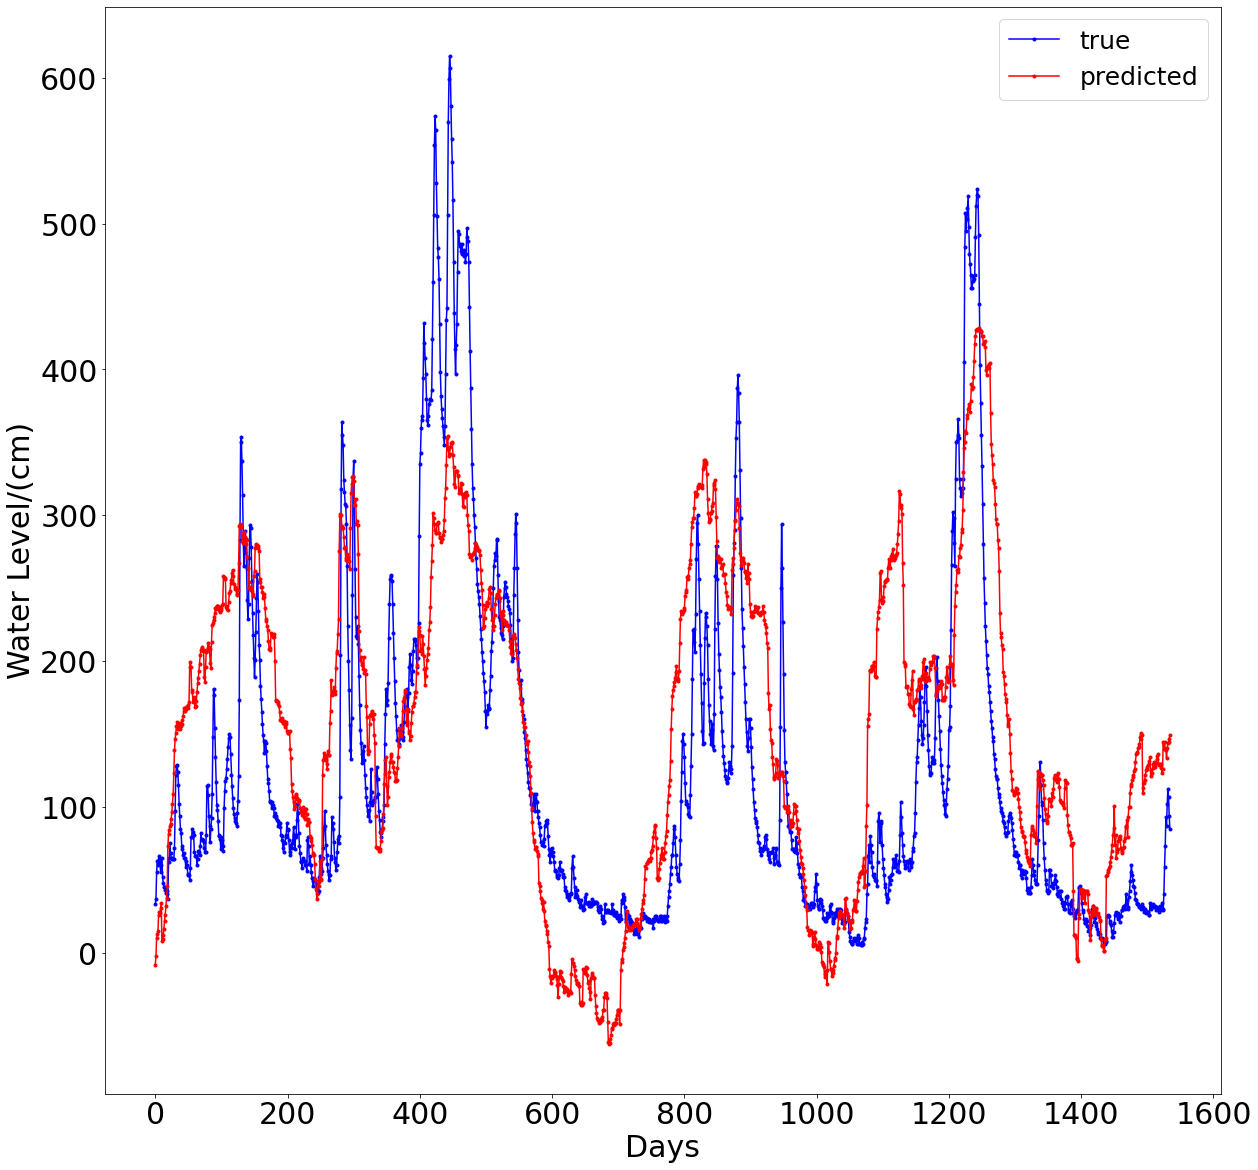

In [34]:
plotresults(y_test_smean_inv,y_pred_test_smean_inv)

In [35]:
pred_test_wlevel,pred_train_wlevel,error_train_wlevel,error_test_wlevel,r2score_wlevel=fitLRmodel(x_train_wlevel_standard,x_test_wlevel_standard,y_train_wlevel_standard,y_test_wlevel_standard)
y_train_wlevel_inv,y_test_wlevel_inv,y_pred_test_wlevel_inv,y_pred_train_wlevel_inv=convert_to_real(scaler_wlevel,y_train_wlevel_standard,y_test_wlevel_standard,pred_test_wlevel,pred_train_wlevel)


In [36]:
print(error_train_wlevel,error_test_wlevel,r2score_wlevel)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv.flatten(),y_pred_test_wlevel_inv.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv.flatten(),y_pred_train_wlevel_inv.flatten())))


0.3446512233395806 0.3870311630650924 0.8272264270948246
test 50.001598681382475
train 44.526420089782015


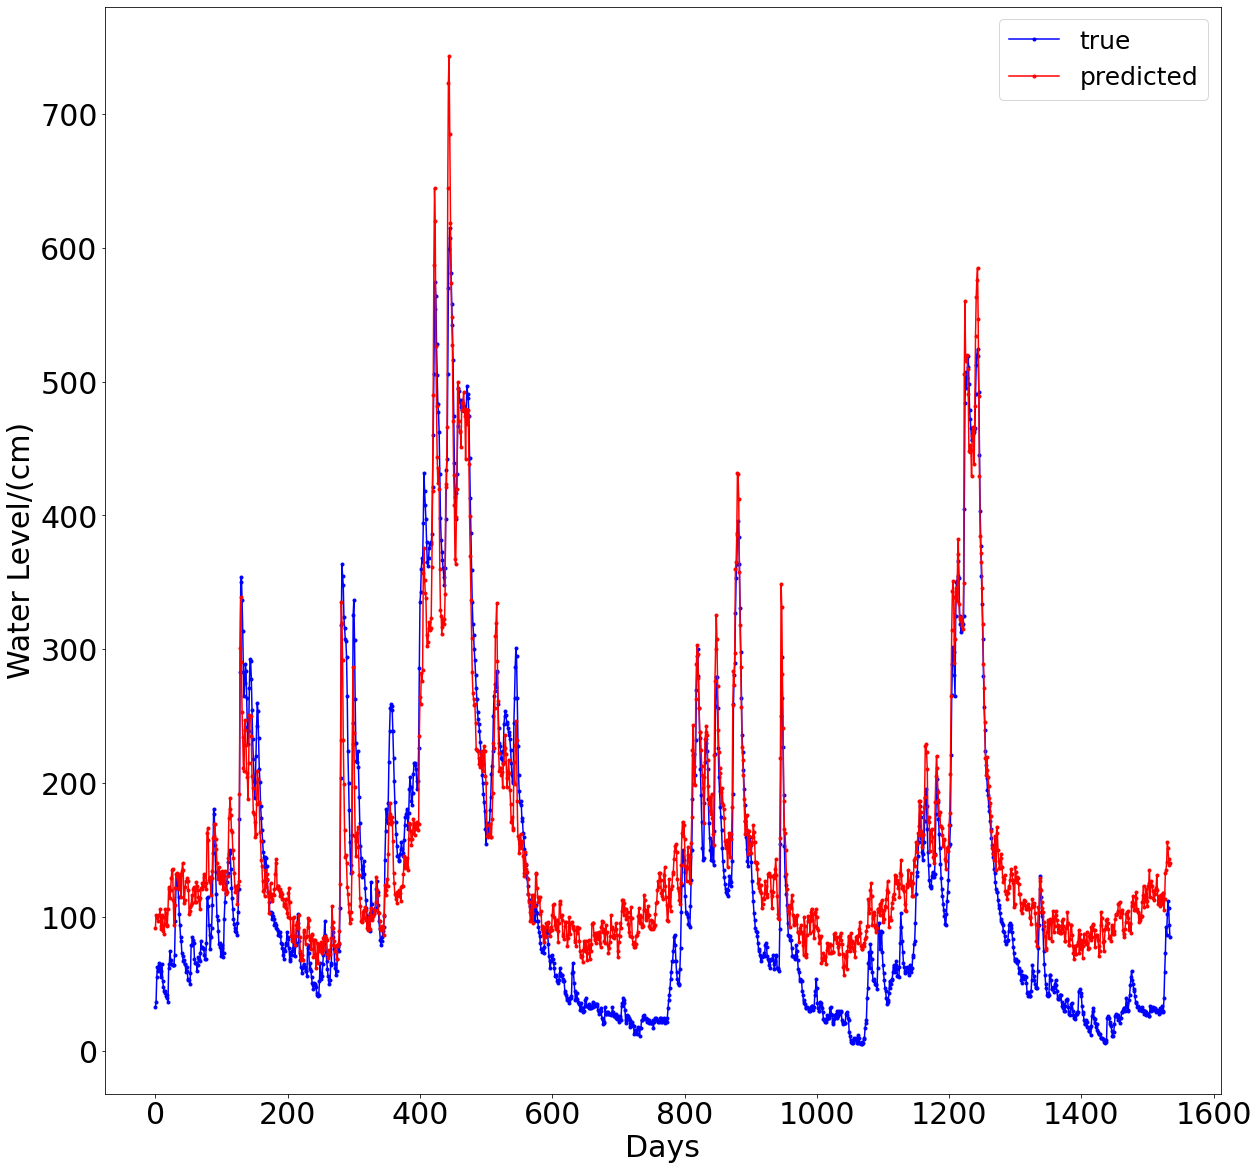

In [37]:
plotresults(y_test_wlevel_inv,y_pred_test_wlevel_inv)


In [38]:
pred_test_wlevel_lag,pred_train_wlevel_lag,error_train_wlevel_lag,error_test_wlevel_lag,r2score_wlevel_lag=fitLRmodel(x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag)
y_train_wlevel_inv_lag,y_test_wlevel_inv_lag,y_pred_test_wlevel_inv_lag,y_pred_train_wlevel_inv_lag=convert_to_real(scaler_wlevel_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,pred_test_wlevel_lag,pred_train_wlevel_lag)


In [39]:
print(error_train_wlevel_lag,error_test_wlevel_lag,r2score_wlevel_lag)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv_lag.flatten(),y_pred_test_wlevel_inv_lag.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv_lag.flatten(),y_pred_train_wlevel_inv_lag.flatten())))



0.05667736348876395 0.04643809912278386 0.9975128979567858
test 5.999996762535391
train 7.322952572681426


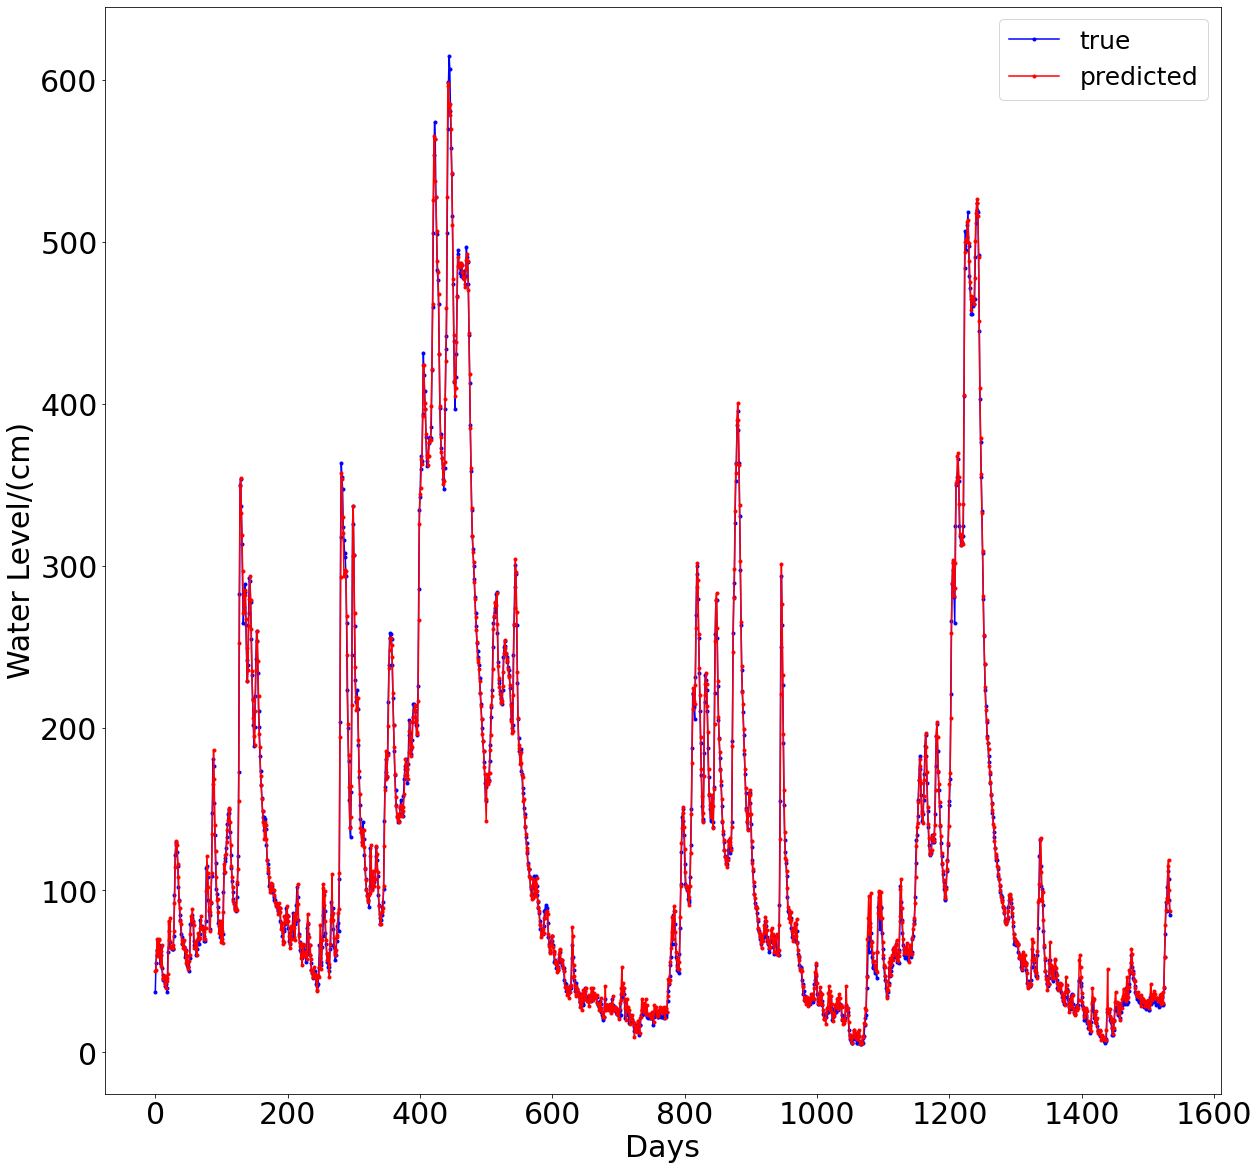

In [40]:
plotresults(y_test_wlevel_inv_lag,y_pred_test_wlevel_inv_lag)


<h1> Find the best lag using errors from LR model <h1>

In [ ]:
def findbestlag(n):
  maxlag=n
  hannover_lag=buildLaggedFeatures(hannover_df_scols,maxlag,False)
  barsinghausen_lag=buildLaggedFeatures(barsinghausen_df_scols,maxlag,False)
  rahden_lag=buildLaggedFeatures(rahden_df_scols,maxlag,False)
  diepholz_lag=buildLaggedFeatures(diepholz_df_scols,maxlag,False)
  bassum_lag=buildLaggedFeatures(bassum_df_scols,maxlag,False)
  soltau_lag=buildLaggedFeatures(soltau_df_scols,maxlag,False)
  hannover_lag_new=hannover_lag.iloc[maxlag:]
  barsinghausen_lag_new=barsinghausen_lag.iloc[maxlag:]
  rahden_lag_new=rahden_lag.iloc[maxlag:]
  diepholz_lag_new=diepholz_lag.iloc[maxlag:]
  bassum_lag_new=bassum_lag.iloc[maxlag:]
  soltau_lag_new=soltau_lag.iloc[maxlag:]


  df_concat_cols_lag= pd.concat([hannover_lag_new,barsinghausen_lag_new,rahden_lag_new,diepholz_lag_new,bassum_lag_new,soltau_lag_new], axis=1)
  datecols_lag=["MESS_DATUM_lag"+str(i) for i in range(1,maxlag+1)]
  for date in datecols_lag:
    dates=df_concat_cols_lag.pop(date)
  df_concat_cols_lag.pop("MESS_DATUM")


  df_mean_cols_lag=df_concat_cols_lag.groupby(by=df_concat_cols_lag.columns, axis=1).mean()
  df_mean_cols_lag["Water Level/(cm)"]=wlevels[maxlag:]
  # df_mean_cols_lag["Tidal Height/(m)"]=tidalheights[maxlag:]

  x_train,x_test,y_train,y_test=create_test_train(df_mean_cols_lag)
  x_train_s,x_test_s,y_train_s,y_test_s,scaler_s=standardize_data(x_train, x_test,y_train,y_test)


  pred_test,pred_train,error_train,error_test,r2score=fitLRmodel(x_train_s,x_test_s,y_train_s,y_test_s)

  return error_train,error_test

In [ ]:
trainlosses=[]
testlosses=[]
for i in range(1,60):
  trloss,teloss=findbestlag(i)
  trainlosses.append(trloss)
  testlosses.append(teloss)

[0.848299344736349, 0.8298412098590641, 0.807844124928662, 0.7865404166169812, 0.7675952328847423, 0.7506846723466112, 0.7358260447869802, 0.7223252113938892, 0.7095300384857057, 0.6976645322410785, 0.6864638752879101, 0.675824165658601, 0.6659002342294885, 0.6566610835978506, 0.6481358269010974, 0.6397865058073844, 0.6314690929275033, 0.6233809554394207, 0.6159054740635155, 0.6087706377116331, 0.6019931748793664, 0.5955286595089224, 0.5896965912612094, 0.5842879431429518, 0.5793640090949745, 0.5750432518500118, 0.5714095994394358, 0.568070914180923, 0.5645999314074102, 0.5610167109442037, 0.5569972114644904, 0.5528180886724444, 0.5488916122242613, 0.5453877912515026, 0.5423819918283126, 0.5396182863964313, 0.5372364479685442, 0.5349350050837295, 0.5327967497926881, 0.5305830634629827, 0.5283029370734152, 0.5262258199112545, 0.5243989302333638, 0.5227812542318928, 0.5211117674686944, 0.5192742747430181, 0.5172820037006386, 0.5153832370642472, 0.5134282211976096, 0.5113942283423333, 0.5

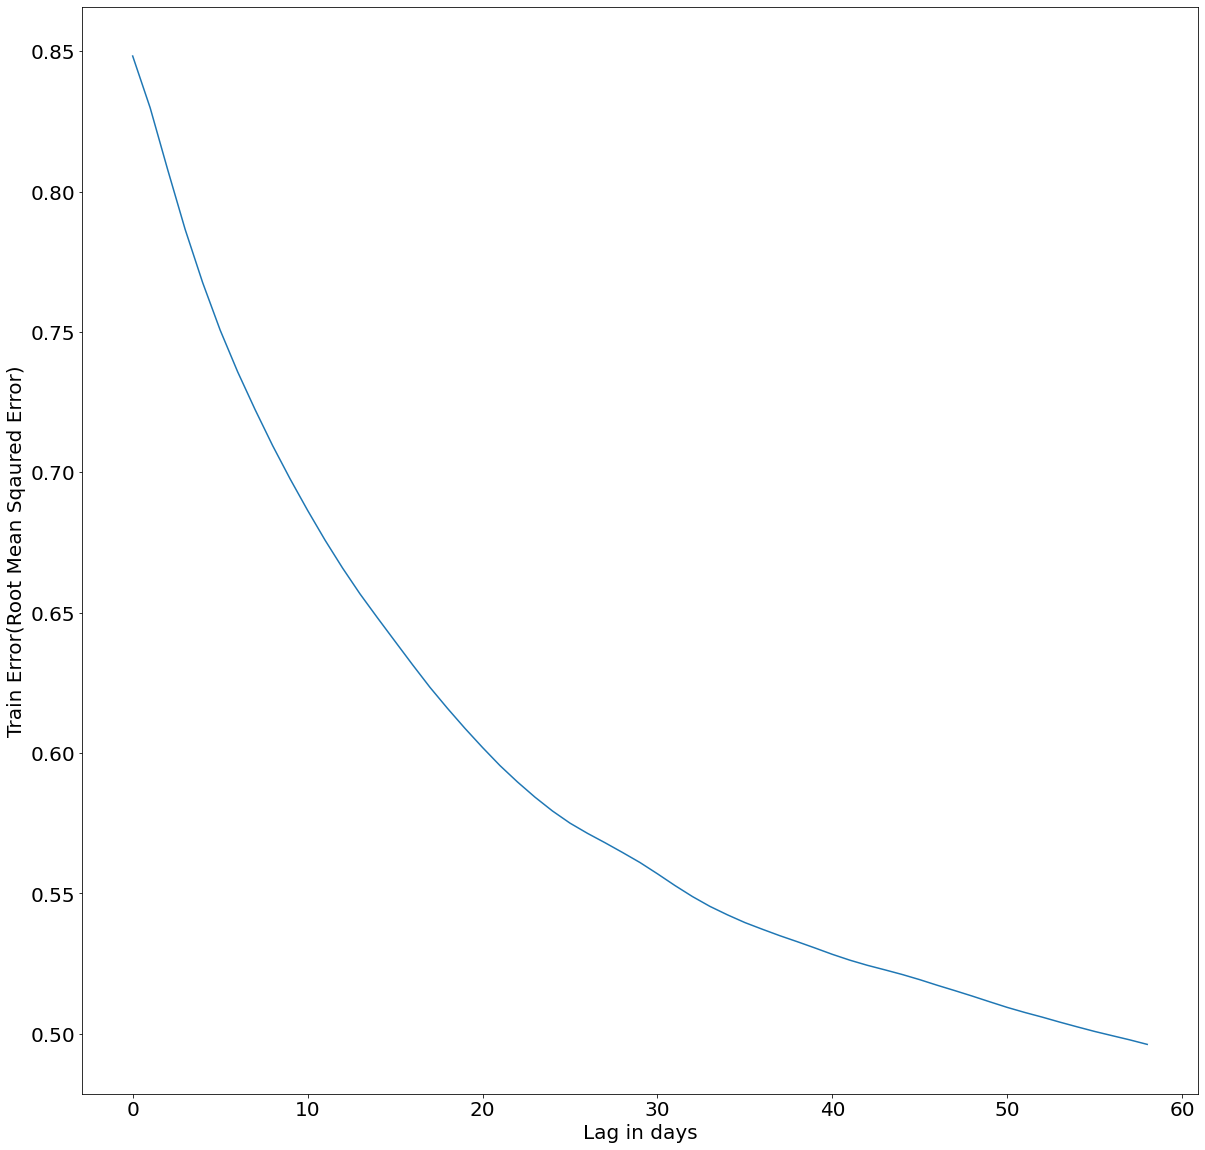

In [ ]:

plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 20})
plt.xlabel("Lag in days")
plt.ylabel("Train Error(Root Mean Sqaured Error)")
plt.plot(trainlosses)

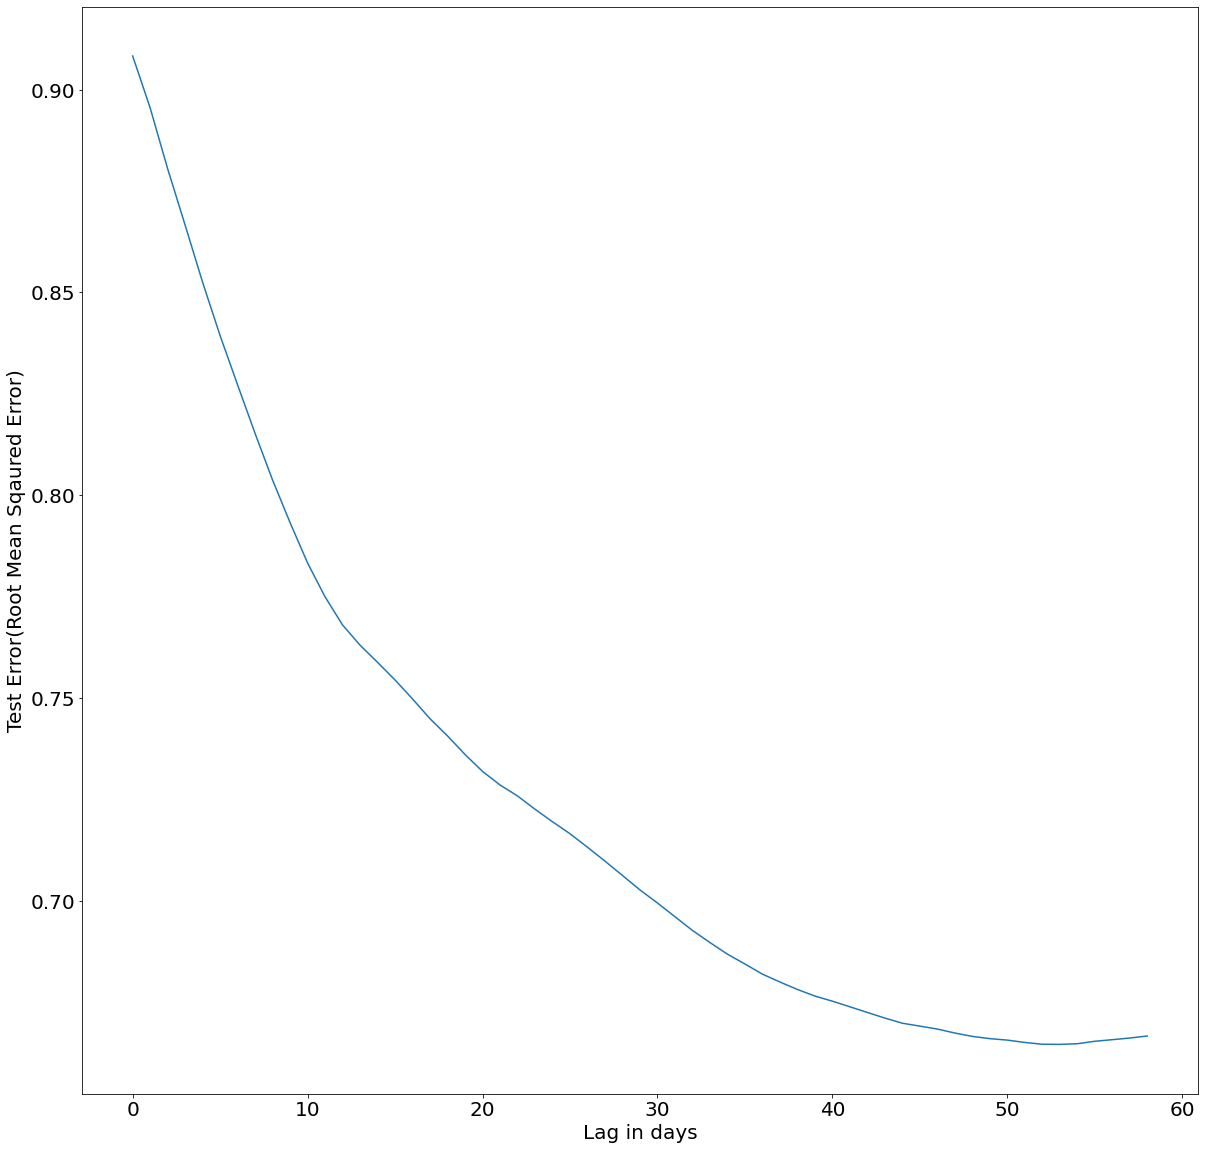

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(testlosses)
plt.xlabel("Lag in days")
plt.ylabel("Test Error(Root Mean Sqaured Error)")

<h1> Fully Connected ANN<h1>

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
def ANN(xtrain,xtest,ytrain,ytest,neurons,epc):
  model = Sequential()
  model.add(Dense(neurons, input_dim=xtrain.shape[1], activation='sigmoid'))
  # model.add(Dense(16, activation='sigmoid'))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])
  history = model.fit(xtrain, ytrain, epochs=epc, batch_size=32,validation_split=0.1,
                  shuffle=False)
  ypredict_test=model.predict(xtest)
  testloss=np.sqrt(mean_squared_error(ytest,ypredict_test))
  ypredict_train=model.predict(xtrain)
  trainloss=np.sqrt(mean_squared_error(ytrain,ypredict_train))
  return testloss, trainloss,ypredict_test,ypredict_train,history


def ploterrorANN(history):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 20})
  plt.plot(history.history['root_mean_squared_error'],label='train')
  plt.plot(history.history['val_root_mean_squared_error'],label='validation')
  plt.xlabel("Epoches")
  plt.ylabel("Root Mean Square Error")
  plt.legend(prop={'size':20})
  # plt.savefig("Results/train-validation-error-ANN-SMA-data")


def plotresultsANN(actual,predicted):
  plt.figure(figsize=(20,20))
  plt.rcParams.update({'font.size': 30})
  plt.plot(actual.flatten(),'b',marker='.',label="true")
  plt.plot(predicted.flatten(),'r',marker='.',label="predicted")
  plt.ylabel("Water Level/(cm)")
  plt.xlabel("Days")
  plt.legend(prop={'size':25})
  # plt.savefig("Results/ANN-SMA-data")



def convert_to_real_ANN(scaler,y_train_standard,y_test_standard,prediction_test_standard,prediction_train_standard):
  y_train_inv=scaler.inverse_transform(y_train_standard.values.reshape(1,-1))
  y_test_inv=scaler.inverse_transform(y_test_standard.values.reshape(1,-1))
  y_pred_test_inv=scaler.inverse_transform(prediction_test_standard)
  y_pred_train_inv=scaler.inverse_transform(prediction_train_standard)
  return y_train_inv,y_test_inv,y_pred_test_inv,y_pred_train_inv


In [45]:
n1 = int((2/3*(x_mean_train_standard.shape[1])))+1
test_loss_mean_ann, train_loss_mean_ann,y_predict_test_mean_ann,y_predict_train_mean_ann,history_mean_ann=ANN(x_mean_train_standard,x_mean_test_standard,y_mean_train_standard,y_mean_test_standard,n1,16)

Epoch 1/16
172/172 [==============================] - 1s 4ms/step - loss: 1.8111 - root_mean_squared_error: 1.3194 - val_loss: 0.2622 - val_root_mean_squared_error: 0.5121
Epoch 2/16
172/172 [==============================] - 1s 3ms/step - loss: 0.9400 - root_mean_squared_error: 0.9671 - val_loss: 0.3082 - val_root_mean_squared_error: 0.5551
Epoch 3/16
172/172 [==============================] - 1s 3ms/step - loss: 0.8394 - root_mean_squared_error: 0.9134 - val_loss: 0.2760 - val_root_mean_squared_error: 0.5253
Epoch 4/16
172/172 [==============================] - 0s 3ms/step - loss: 0.5450 - root_mean_squared_error: 0.7346 - val_loss: 0.2836 - val_root_mean_squared_error: 0.5325
Epoch 5/16
172/172 [==============================] - 1s 3ms/step - loss: 0.5073 - root_mean_squared_error: 0.7071 - val_loss: 0.2894 - val_root_mean_squared_error: 0.5379
Epoch 6/16
172/172 [==============================] - 1s 3ms/step - loss: 0.4873 - root_mean_squared_error: 0.6930 - val_loss: 0.2956 - val_

In [46]:
print(test_loss_mean_ann, train_loss_mean_ann)



0.6557669228256056 0.587697088700221


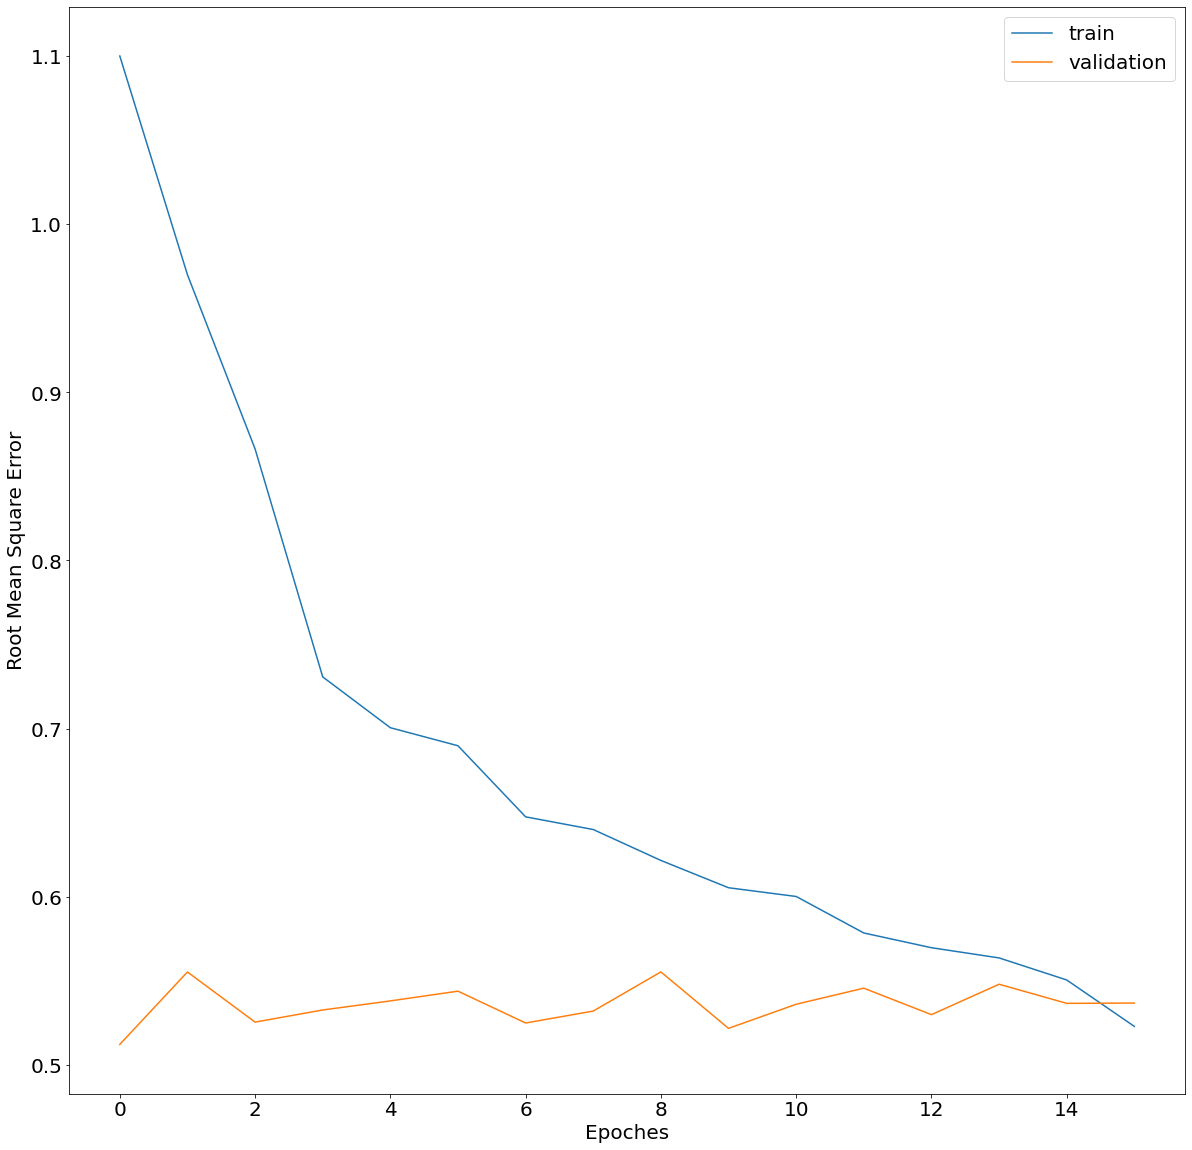

In [47]:
ploterrorANN(history_mean_ann)
# plt.savefig("Results/train-val-Lagged")

In [50]:
y_train_mean_inv_ann,y_test_mean_inv_ann,y_pred_test_mean_inv_ann,y_pred_train_mean_inv_ann=convert_to_real_ANN(scaler_mean,y_mean_train_standard,y_mean_test_standard,y_predict_test_mean_ann,y_predict_train_mean_ann)

test 84.6308098622033
train 75.84597434473716
r2 0.5074110526704108


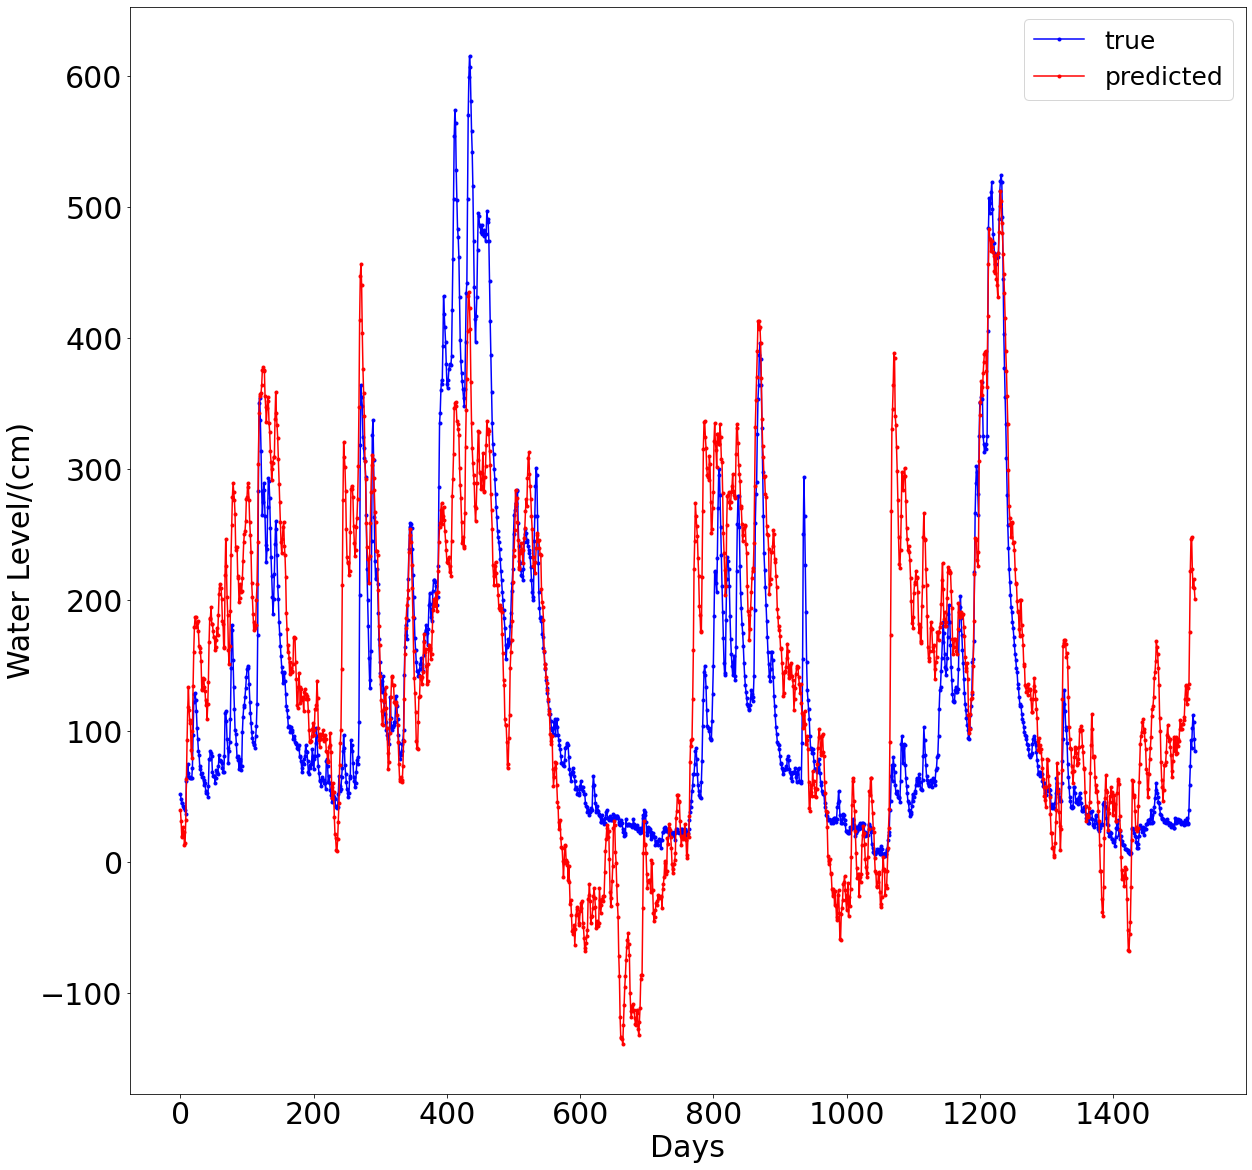

In [51]:
print("test",np.sqrt(mean_squared_error(y_test_mean_inv_ann.flatten(),y_pred_test_mean_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_mean_inv_ann.flatten(),y_pred_train_mean_inv_ann.flatten())))
print("r2",r2_score(y_test_mean_inv_ann.flatten(),y_pred_test_mean_inv_ann.flatten()))
plotresultsANN(y_test_mean_inv,y_pred_test_mean_inv)
# plt.savefig("Results/ANN-Lagged")


SMA

In [52]:
n2=int(2/3 * (x_smean_train_standard.shape[1]))+1
test_loss_smean_ann, train_loss_smean_ann,y_predict_test_smean_ann,y_predict_train_smean_ann,history_smean_ann=ANN(x_smean_train_standard[SMAwindow:],x_smean_test_standard,y_smean_train_standard[SMAwindow:],y_smean_test_standard,n2,16)

Epoch 1/16
171/171 [==============================] - 1s 3ms/step - loss: 1.1941 - root_mean_squared_error: 1.0823 - val_loss: 0.3697 - val_root_mean_squared_error: 0.6080
Epoch 2/16
171/171 [==============================] - 0s 2ms/step - loss: 0.9738 - root_mean_squared_error: 0.9783 - val_loss: 0.3294 - val_root_mean_squared_error: 0.5740
Epoch 3/16
171/171 [==============================] - 0s 2ms/step - loss: 0.8466 - root_mean_squared_error: 0.9130 - val_loss: 0.3016 - val_root_mean_squared_error: 0.5491
Epoch 4/16
171/171 [==============================] - 0s 1ms/step - loss: 0.7824 - root_mean_squared_error: 0.8783 - val_loss: 0.2857 - val_root_mean_squared_error: 0.5345
Epoch 5/16
171/171 [==============================] - 0s 2ms/step - loss: 0.7458 - root_mean_squared_error: 0.8572 - val_loss: 0.2766 - val_root_mean_squared_error: 0.5260
Epoch 6/16
171/171 [==============================] - 0s 2ms/step - loss: 0.7203 - root_mean_squared_error: 0.8433 - val_loss: 0.2695 - val_

In [53]:
print(test_loss_smean_ann, train_loss_smean_ann)

0.6942939136738486 0.6578917886370204


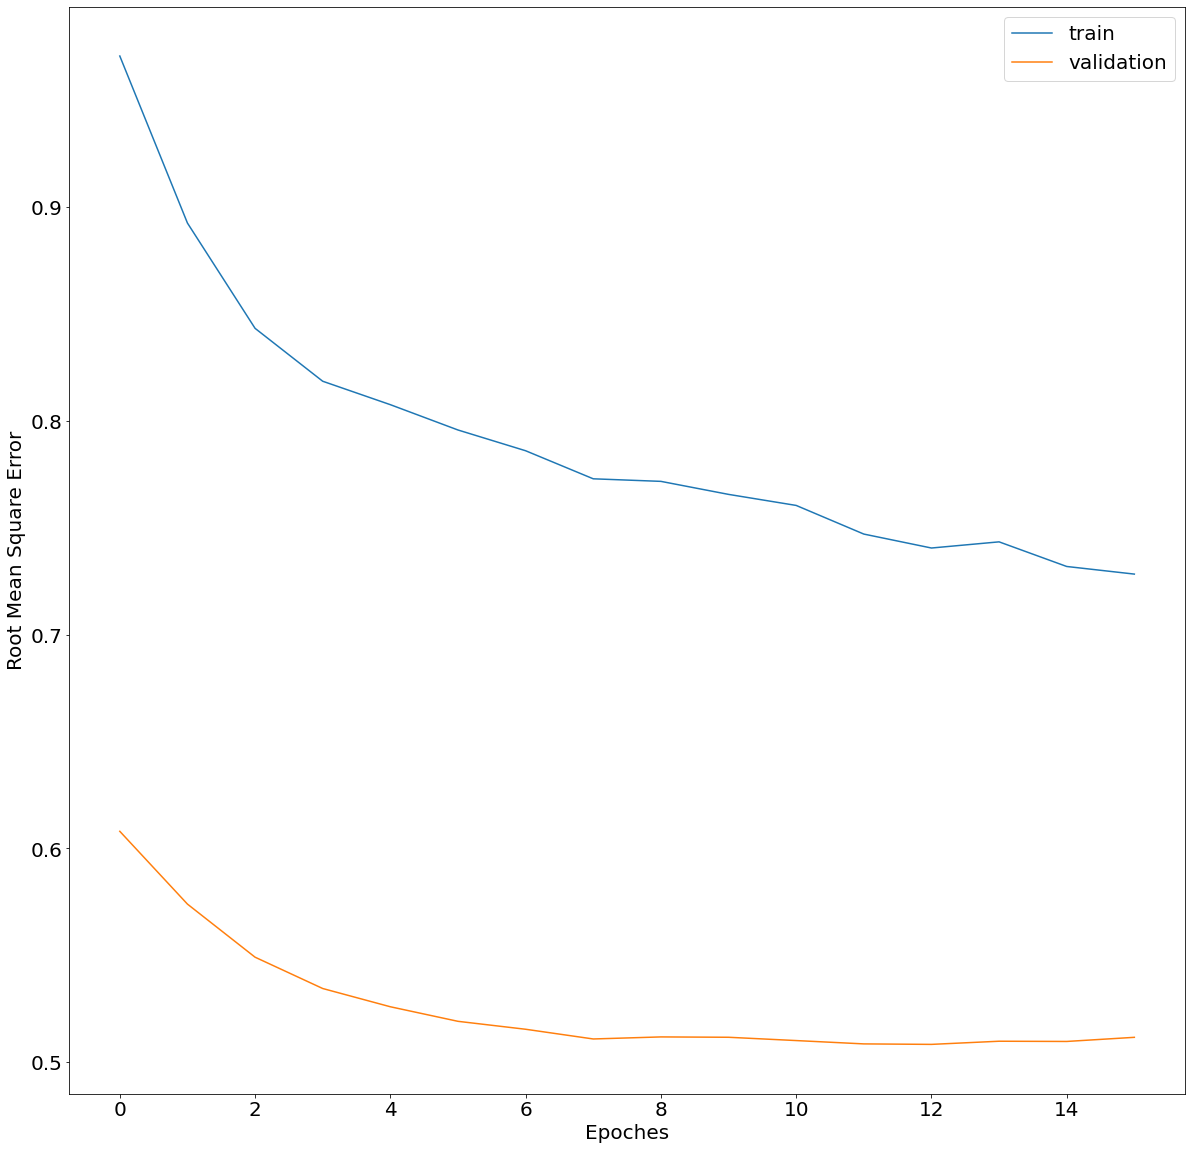

In [54]:
ploterrorANN(history_smean_ann)
# plt.savefig("Results/train-val-SMA")

In [55]:
y_train_smean_inv_ann,y_test_smean_inv_ann,y_pred_test_smean_inv_ann,y_pred_train_smean_inv_ann=convert_to_real_ANN(scaler_smean,y_smean_train_standard,y_smean_test_standard,y_predict_test_smean_ann,y_predict_train_smean_ann)

In [56]:
print("test",np.sqrt(mean_squared_error(y_test_smean_inv_ann.flatten(),y_pred_test_smean_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_smean_inv_ann.flatten()[SMAwindow:],y_pred_train_smean_inv_ann.flatten())))
print("r2",r2_score(y_test_smean_inv_ann.flatten(),y_pred_test_smean_inv_ann.flatten()))

test 89.69770103520091
train 84.99481215503783
r2 0.44400337087289


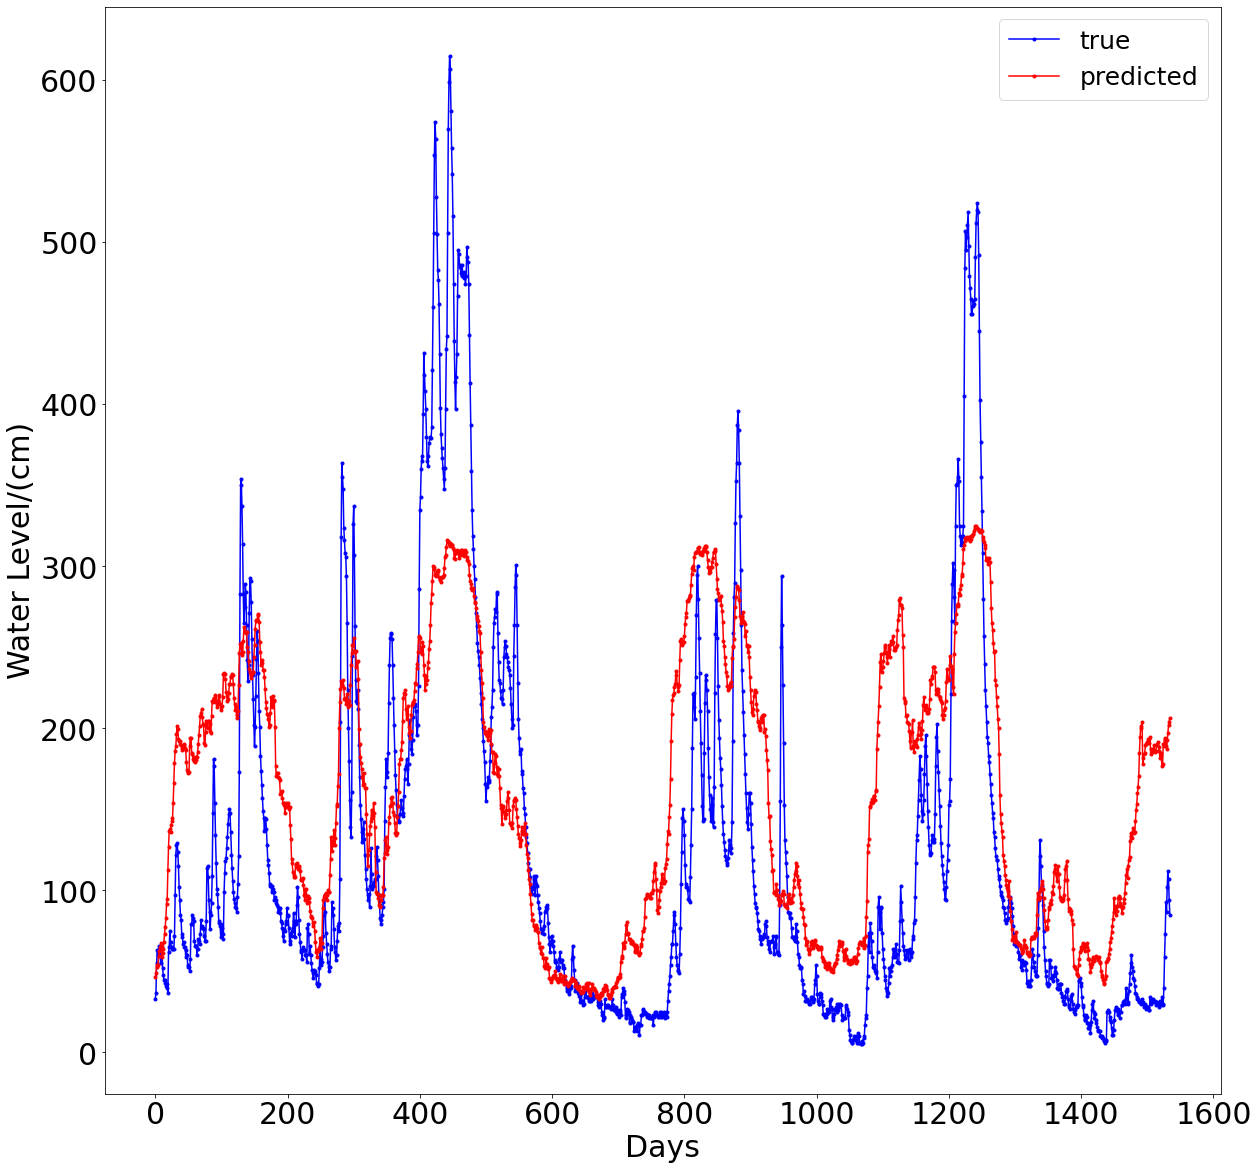

In [57]:
plotresultsANN(y_test_smean_inv_ann,y_pred_test_smean_inv_ann)
# plt.savefig("Results/ANN-SMA")

In [58]:
n3=int(2/3 *(x_train_wlevel_standard.shape[1]))+1

test_loss_wlevel_ann, train_loss_wlevel_ann,y_predict_test_wlevel_ann,y_predict_train_wlevel_ann,history_wlevel_ann=ANN(x_train_wlevel_standard,x_test_wlevel_standard,y_train_wlevel_standard,y_test_wlevel_standard,n3,30)


Epoch 1/30
173/173 [==============================] - 1s 3ms/step - loss: 1.2151 - root_mean_squared_error: 1.0973 - val_loss: 0.4304 - val_root_mean_squared_error: 0.6560
Epoch 2/30
173/173 [==============================] - 0s 2ms/step - loss: 0.9832 - root_mean_squared_error: 0.9874 - val_loss: 0.3597 - val_root_mean_squared_error: 0.5997
Epoch 3/30
173/173 [==============================] - 0s 1ms/step - loss: 0.8401 - root_mean_squared_error: 0.9133 - val_loss: 0.3068 - val_root_mean_squared_error: 0.5539
Epoch 4/30
173/173 [==============================] - 0s 2ms/step - loss: 0.7834 - root_mean_squared_error: 0.8817 - val_loss: 0.2696 - val_root_mean_squared_error: 0.5192
Epoch 5/30
173/173 [==============================] - 0s 2ms/step - loss: 0.6873 - root_mean_squared_error: 0.8260 - val_loss: 0.2363 - val_root_mean_squared_error: 0.4861
Epoch 6/30
173/173 [==============================] - 0s 2ms/step - loss: 0.6208 - root_mean_squared_error: 0.7853 - val_loss: 0.2051 - val_

In [ ]:
print(test_loss_wlevel_ann, train_loss_wlevel_ann)

0.3262095630576406 0.28600879478306496


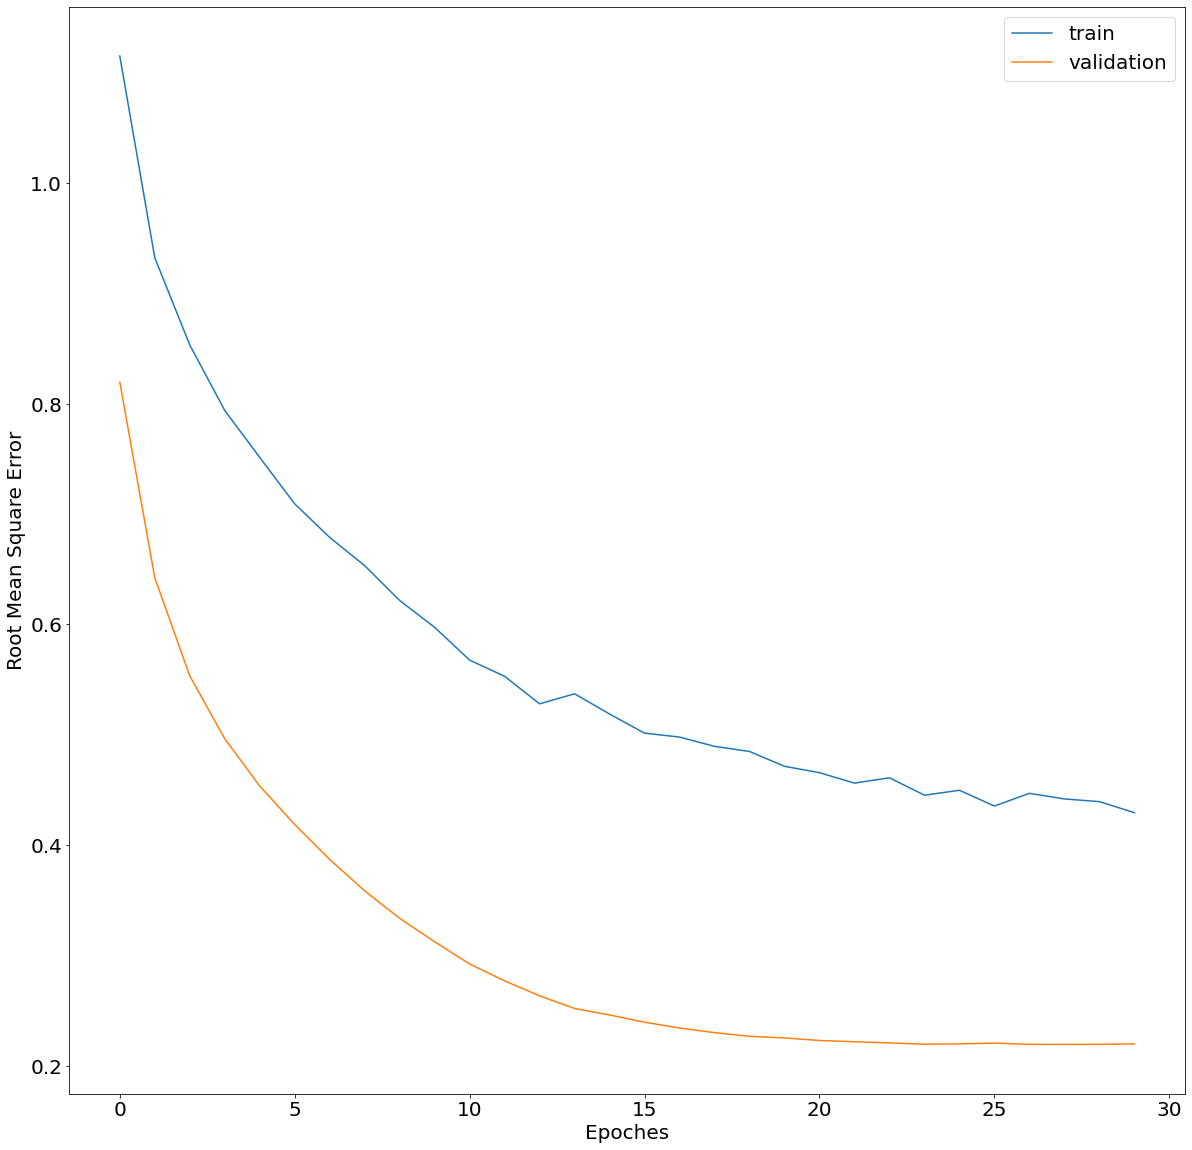

In [ ]:
ploterrorANN(history_wlevel_ann)
plt.savefig("Results/train-validation-datawithstolzenau")

In [ ]:
y_train_wlevel_inv_ann,y_test_wlevel_inv_ann,y_pred_test_wlevel_inv_ann,y_pred_train_wlevel_inv_ann=convert_to_real_ANN(scaler_wlevel,y_train_wlevel_standard,y_test_wlevel_standard,y_predict_test_wlevel_ann,y_predict_train_wlevel_ann)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv_ann.flatten(),y_pred_test_wlevel_inv_ann.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv_ann.flatten(),y_pred_train_wlevel_inv_ann.flatten())))
print("r2",r2_score(y_test_wlevel_inv_ann.flatten(),y_pred_test_wlevel_inv_ann.flatten()))

test 42.14389106322995
train 36.95024531667654
r2 0.8772620696953574


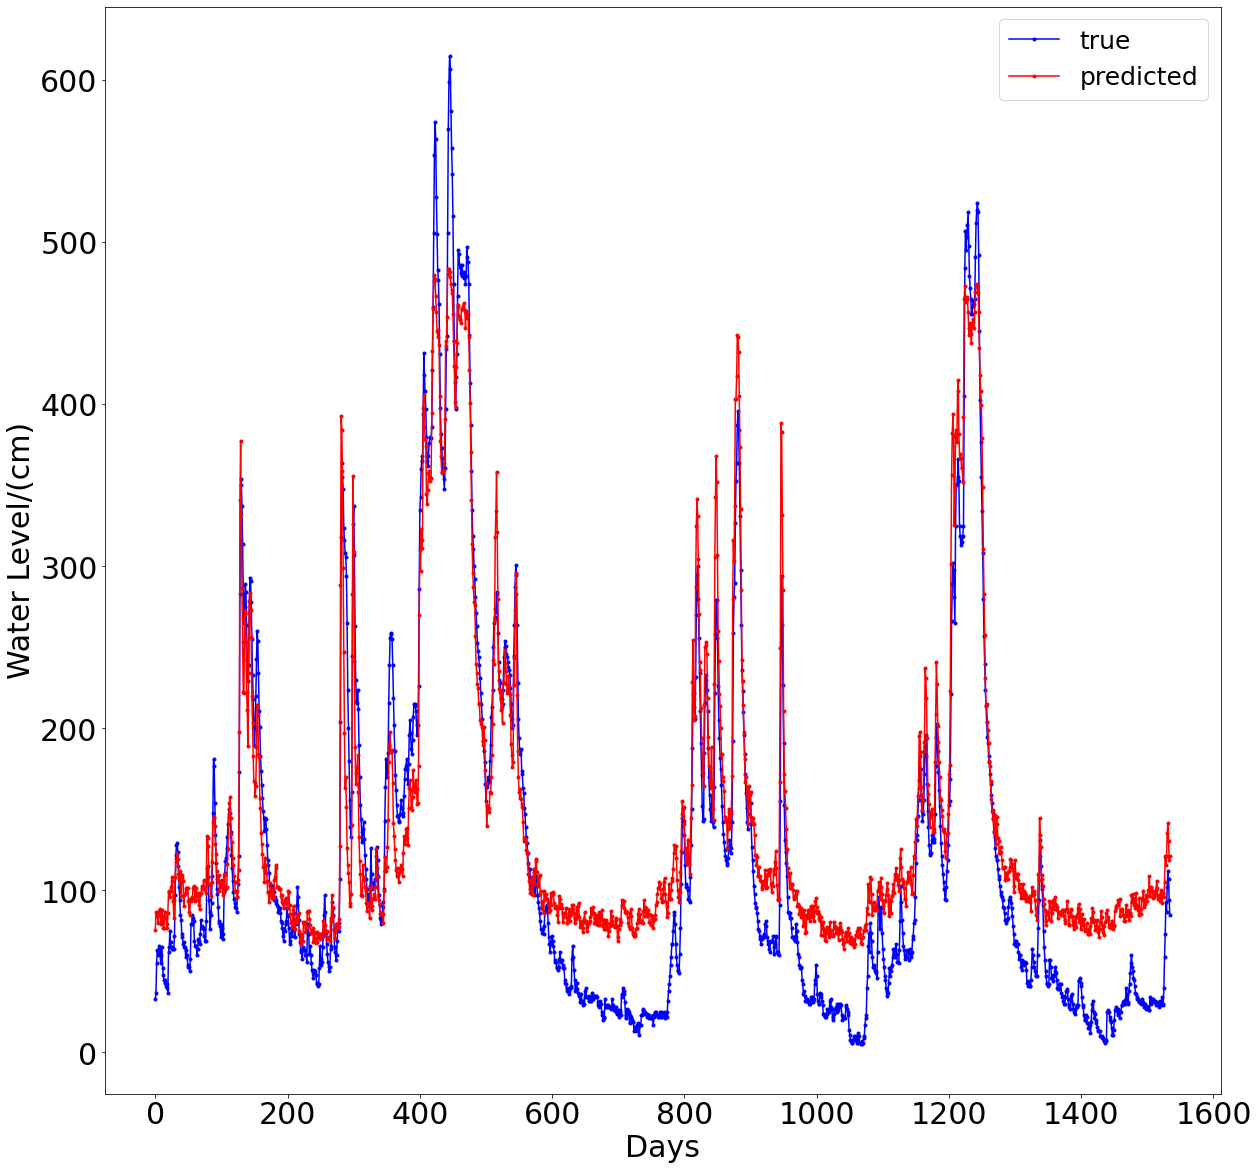

In [ ]:
plotresultsANN(y_test_wlevel_inv_ann,y_pred_test_wlevel_inv_ann)
plt.savefig("Results/ANN-withstolzenau")

In [ ]:
n4=int(2/3*(x_train_wlevel_standard_lag.shape[1]))+1
test_loss_wlevel_ann_lag, train_loss_wlevel_ann_lag,y_predict_test_wlevel_ann_lag,y_predict_train_wlevel_ann_lag,history_wlevel_ann_lag=ANN(x_train_wlevel_standard_lag,x_test_wlevel_standard_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,n4,30)


Epoch 1/30
173/173 [==============================] - 2s 6ms/step - loss: 0.8352 - root_mean_squared_error: 0.9139 - val_loss: 0.1176 - val_root_mean_squared_error: 0.3429
Epoch 2/30
173/173 [==============================] - 1s 5ms/step - loss: 0.2989 - root_mean_squared_error: 0.5467 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1840
Epoch 3/30
173/173 [==============================] - 1s 5ms/step - loss: 0.2009 - root_mean_squared_error: 0.4482 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1461
Epoch 4/30
173/173 [==============================] - 1s 4ms/step - loss: 0.1672 - root_mean_squared_error: 0.4089 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1379
Epoch 5/30
173/173 [==============================] - 1s 4ms/step - loss: 0.1556 - root_mean_squared_error: 0.3944 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 6/30
173/173 [==============================] - 1s 3ms/step - loss: 0.1455 - root_mean_squared_error: 0.3814 - val_loss: 0.0193 - val_

In [ ]:
print(test_loss_wlevel_ann_lag, train_loss_wlevel_ann_lag)

0.14425931238307202 0.13392473480032302


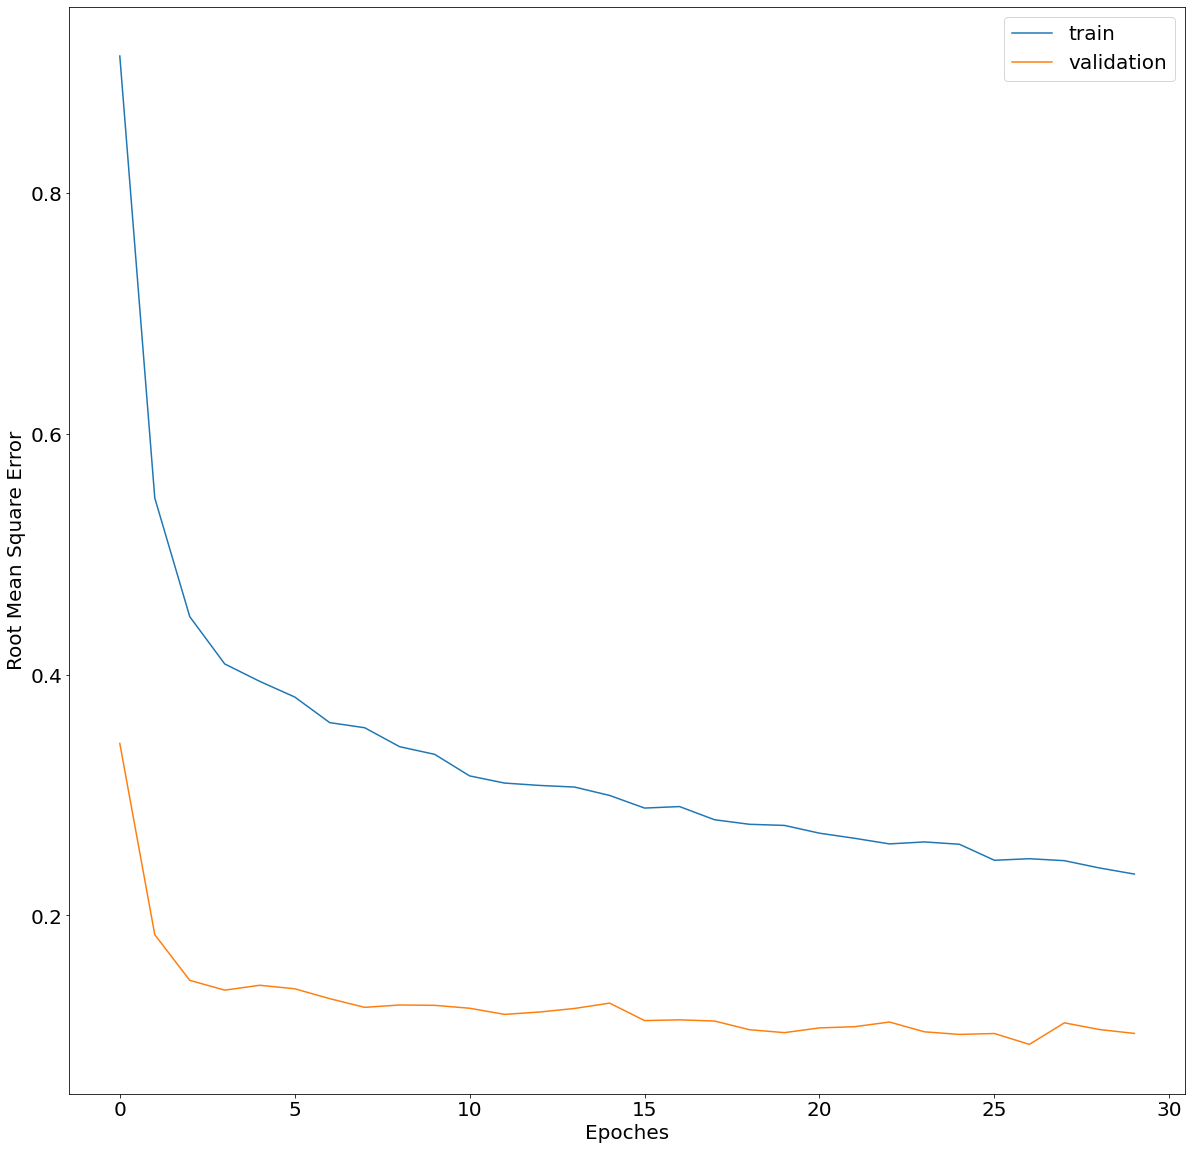

In [ ]:
ploterrorANN(history_wlevel_ann_lag)
plt.savefig("Results/train-validation-error-ANN-datawithstolzenau-intschede")

In [ ]:
y_train_wlevel_inv_ann_lag,y_test_wlevel_inv_ann_lag,y_pred_test_wlevel_inv_ann_lag,y_pred_train_wlevel_inv_ann_lag=convert_to_real_ANN(scaler_wlevel_lag,y_train_wlevel_standard_lag,y_test_wlevel_standard_lag,y_predict_test_wlevel_ann_lag,y_predict_train_wlevel_ann_lag)
print("test",np.sqrt(mean_squared_error(y_test_wlevel_inv_ann_lag.flatten(),y_pred_test_wlevel_inv_ann_lag.flatten())))
print("train",np.sqrt(mean_squared_error(y_train_wlevel_inv_ann_lag.flatten(),y_pred_train_wlevel_inv_ann_lag.flatten())))
print("r2",r2_score(y_test_wlevel_inv_ann_lag.flatten(),y_pred_test_wlevel_inv_ann_lag.flatten()))

test 18.638906644945585
train 17.303635343736694
r2 0.9759988285967952


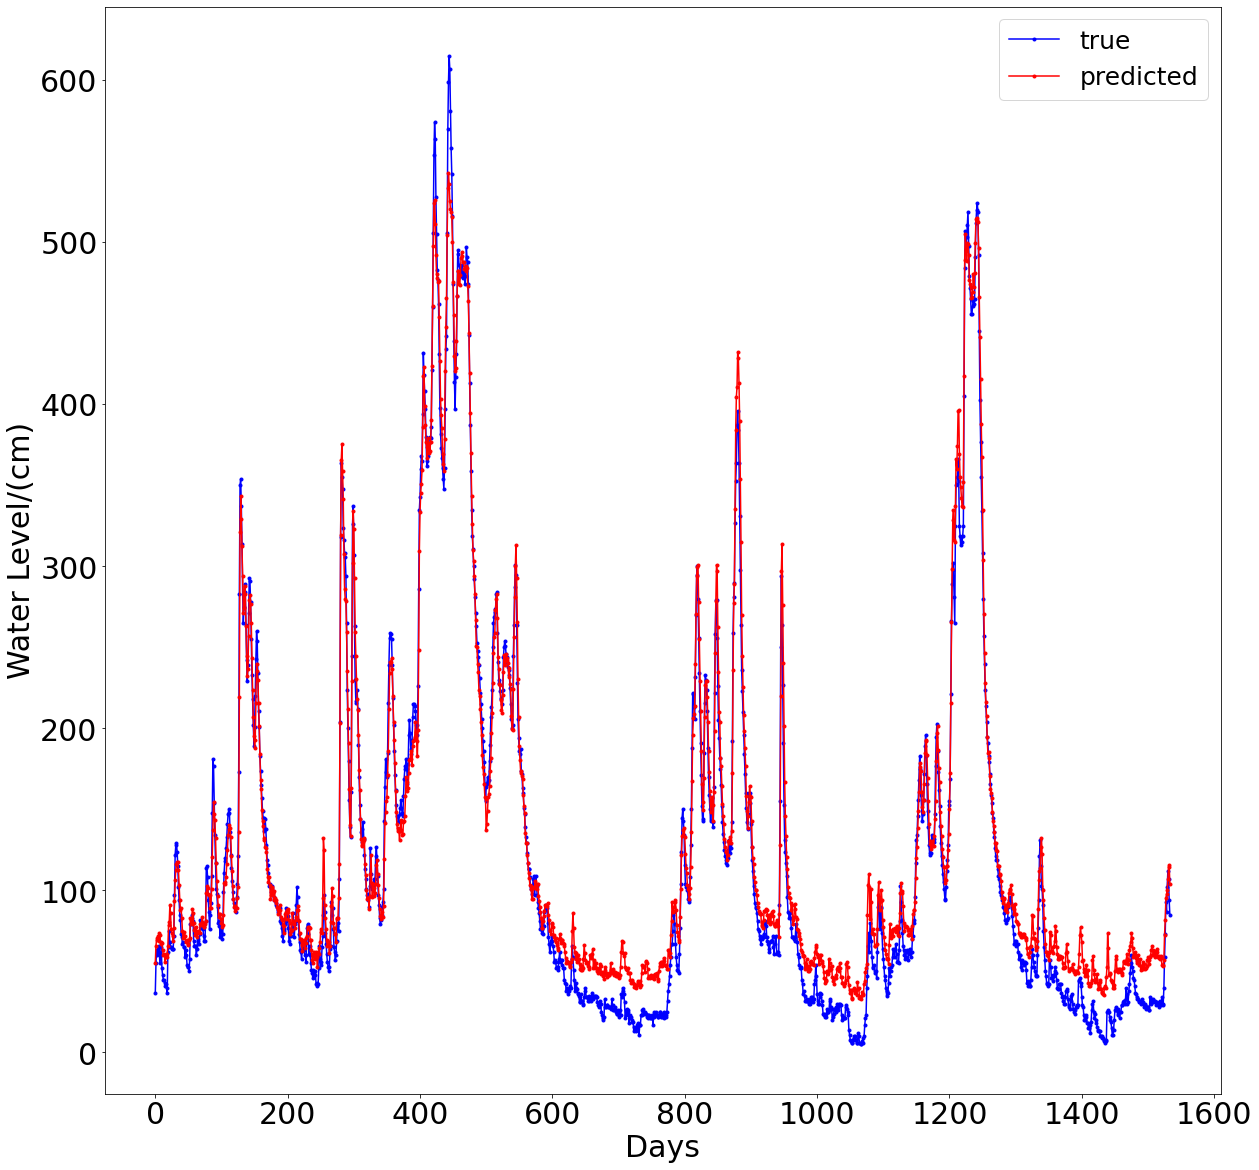

In [ ]:
plotresultsANN(y_test_wlevel_inv_ann_lag,y_pred_test_wlevel_inv_ann_lag)
plt.savefig("Results/ANN-data-with-stolzenau-intschede-waterlevel")